# 1. Understanding the data

## 1.1 Non graphical approach


In [2]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import sklearn


#Load the data
df = pd.read_csv('./data/salaries.csv')


#View the data
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Manager,115000,USD,115000,US,0,US,M
1,2025,SE,FT,Manager,85000,USD,85000,US,0,US,M
2,2025,SE,FT,Consultant,171800,USD,171800,US,0,US,M
3,2025,SE,FT,Consultant,96600,USD,96600,US,0,US,M
4,2025,MI,FT,Data Scientist,145000,USD,145000,US,0,US,M


In [3]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73306 entries, 0 to 73305
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73306 non-null  int64 
 1   experience_level    73306 non-null  object
 2   employment_type     73306 non-null  object
 3   job_title           73306 non-null  object
 4   salary              73306 non-null  int64 
 5   salary_currency     73306 non-null  object
 6   salary_in_usd       73306 non-null  int64 
 7   employee_residence  73306 non-null  object
 8   remote_ratio        73306 non-null  int64 
 9   company_location    73306 non-null  object
 10  company_size        73306 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.2+ MB


There are 10 columns or variable types, from which 7 are categorical and 4 scalar. It seems that NaN values are not included in the dataset based on this table.

In [4]:
#Examine descriptive statistic
df.describe(include=object)# for categorical variables

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,73306,73306,73306,73306,73306,73306,73306
unique,4,4,289,25,93,86,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,43022,72964,11485,69572,66122,66175,70692


The 7 categorical variables are described above. From the 289 job titles, the most frequent is Data Scientist. Most jobs are full time type aimed to professionals with Senior Experience and most of the hiring companies are classified as medium size and located in US.

The table below shows information of the 4 continuous variables. The information collected goes from the year 2020-2025, the column of salary variates because it is given in different currencies, but when normalized to USD the salary range in Data professions goes from 15.000 USD to 800.000 USD.

In [5]:
#Describe continuous variables
pd.set_option('display.float_format',lambda x: '%.0f' % x)
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73306,73306,73306,73306
mean,2024,162597,157988,22
std,0,192962,72505,41
min,2020,14000,15000,0
25%,2024,106840,106800,0
50%,2024,148000,147500,0
75%,2024,200000,199700,0
max,2025,30400000,800000,100


The most common salary in USD and remote ratio are obtained with "the mode" below.

In [6]:
#Obtaining modes 
print('Most common salary in Dollars (USD):', df['salary_in_usd'].mode())
print('Most common remote ratio:', df['remote_ratio'].mode())

Most common salary in Dollars (USD): 0    160000
Name: salary_in_usd, dtype: int64
Most common remote ratio: 0    0
Name: remote_ratio, dtype: int64


The most common salary is around 160.000 USD a year, and the most common remote ratio (0) indicates that the on site Data jobs are the most common.

In [7]:
#checking for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are not missing values!

In [8]:
#Exploring values in categorical variables 
print('Experience level:', df['experience_level'].unique())
print('Employment type:', df['employment_type'].unique())
print('Job title:', df['job_title'].unique())
print('Company size:', df['company_size'].unique())


Experience level: ['SE' 'MI' 'EN' 'EX']
Employment type: ['FT' 'CT' 'PT' 'FL']
Job title: ['Manager' 'Consultant' 'Data Scientist' 'Software Engineer' 'Analyst'
 'Architect' 'Data Analyst' 'Associate' 'Data Management Specialist'
 'Data Governance' 'Data Engineer' 'Product Manager' 'Applied Scientist'
 'Software Development Engineer' 'Engineer' 'Research Scientist'
 'Machine Learning Engineer' 'Machine Learning Scientist'
 'Business Intelligence Developer' 'Data Architect' 'Power BI Developer'
 'Data Product Owner' 'AI Architect' 'AI Engineer' 'Research Engineer'
 'Data Manager' 'Quantitative Developer' 'Technical Lead'
 'Sales Development Representative' 'System Engineer' 'Analytics Engineer'
 'Solution Architect' 'Encounter Data Management Professional'
 'Data Infrastructure Engineer' 'Data Team Lead'
 'Business Intelligence Lead' 'DevOps Engineer' 'Decision Scientist'
 'Data Visualization Engineer' 'Data Governance Analyst'
 'Data Quality Analyst' 'Lead Analyst' 'Data Specialist'
 '

In [9]:
#Exploring values in categorical variables
print('Salary currency:', df['salary_currency'].unique())
print('Employee residence:', df['employee_residence'].unique())
print('Company location:', df['company_location'].unique())

Salary currency: ['USD' 'INR' 'GBP' 'EUR' 'PHP' 'CAD' 'SGD' 'BRL' 'PLN' 'CHF' 'AUD' 'JPY'
 'DKK' 'CZK' 'HUF' 'MXN' 'ILS' 'TRY' 'ZAR' 'SEK' 'NZD' 'NOK' 'HKD' 'THB'
 'CLP']
Employee residence: ['US' 'CA' 'GB' 'AU' 'IN' 'DE' 'LT' 'SK' 'FR' 'AT' 'PH' 'AM' 'SG' 'LU'
 'BR' 'NL' 'IT' 'CO' 'CL' 'PL' 'CY' 'ES' 'RW' 'NZ' 'CH' 'LV' 'IL' 'CZ'
 'IE' 'JP' 'PE' 'KR' 'ZA' 'EG' 'PR' 'LB' 'GR' 'AR' 'FI' 'MX' 'DK' 'NG'
 'BE' 'BG' 'EC' 'SV' 'CR' 'HU' 'PT' 'HR' 'KE' 'SE' 'UA' 'TR' 'PK' 'HN'
 'MT' 'RO' 'VE' 'BM' 'VN' 'RS' 'GE' 'AE' 'SA' 'OM' 'BA' 'EE' 'UG' 'SI'
 'MU' 'TH' 'QA' 'RU' 'TN' 'GH' 'AD' 'MD' 'NO' 'UZ' 'HK' 'CF' 'KW' 'IR'
 'AS' 'CN' 'BO' 'DO' 'ID' 'MY' 'DZ' 'IQ' 'JE']
Company location: ['US' 'CA' 'GB' 'AU' 'IN' 'DE' 'LT' 'SK' 'FR' 'AT' 'PH' 'AM' 'SG' 'LU'
 'BR' 'NL' 'IT' 'CO' 'CL' 'PL' 'CY' 'ES' 'CD' 'NZ' 'CH' 'LV' 'IL' 'CZ'
 'IE' 'JP' 'PE' 'KR' 'ZA' 'EG' 'PR' 'LB' 'GR' 'AR' 'FI' 'MX' 'DK' 'NG'
 'BE' 'BG' 'EC' 'SV' 'CR' 'HU' 'PT' 'HR' 'KE' 'SE' 'UA' 'TR' 'PK' 'HN'
 'MT' 'RO' 'VE' 'DZ' 'AS' 'RS' 'AE

## 1.2 Graphical approach
This part will help to visualize the variables to understand the data.

### Employment types

Text(0.5, 0, 'Employment type')

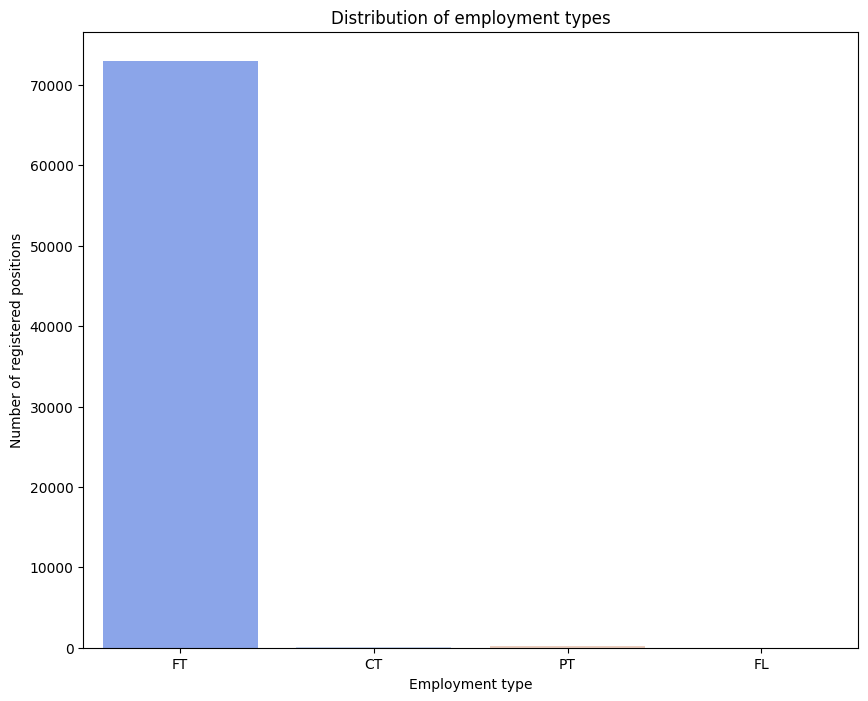

In [10]:
#Investigating the employment type distribution

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='employment_type', palette='coolwarm')
# Add labels and title
plt.title('Distribution of employment types')
plt.ylabel('Number of registered positions')
plt.xlabel('Employment type')    



As the height of the bars are too different, the chart needs to be adjusted for visibility. This will be explored with a break in the scale or with a log scale.

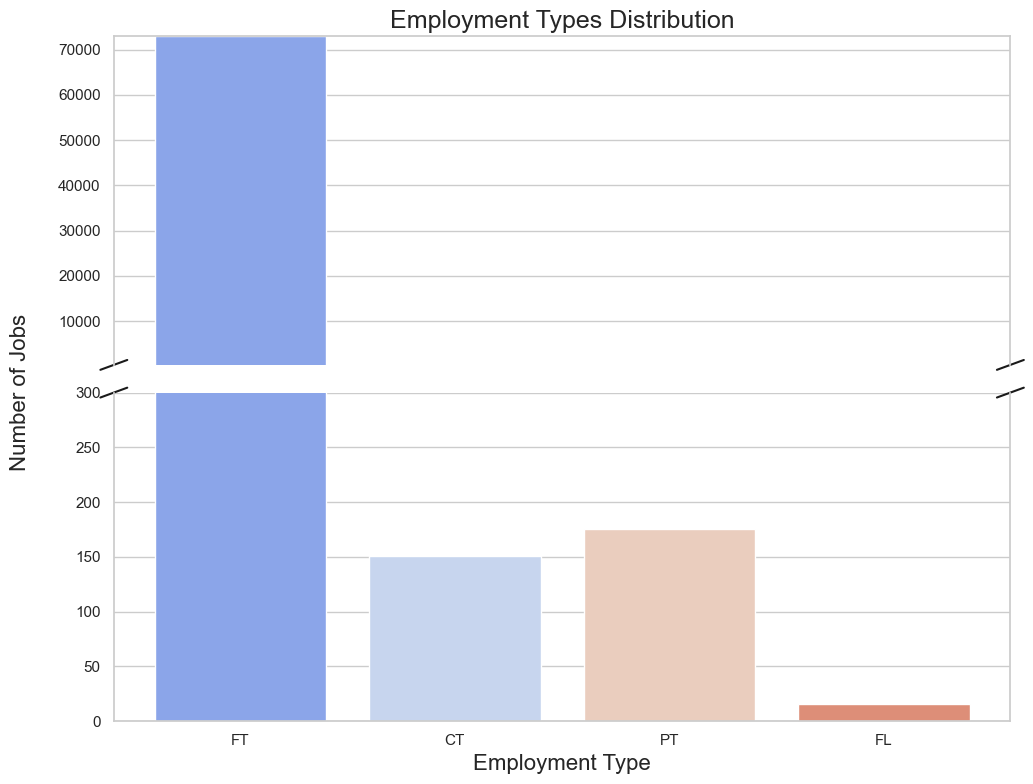

In [11]:
#Adding a breaking point to the graph for Employment types
sns.set_theme(style="whitegrid")
# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Define the breaking point
break_point = 300  #  Based on data distribution

# Top plot for larger values
sns.countplot(data=df, x='employment_type', palette='coolwarm', ax=ax1)
ax1.set_ylim(break_point, df['employment_type'].value_counts().max())  # Focus on larger bars

# Bottom plot for smaller values
sns.countplot(data=df, x='employment_type', palette='coolwarm', ax=ax2)
ax2.set_ylim(0, break_point)  # Focus on smaller bars

# Hide the spines between the two plots
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add the break marks
d = 0.015  # Break size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top diagonal line
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top diagonal line on the right

kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom diagonal line
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom diagonal line on the right

# Titles and labels
ax1.set_title('Employment Types Distribution',fontsize=18)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax2.set_xlabel('Employment Type', fontsize=16)
# Set a single y-label spanning both subplots
fig.text(-0.03, 0.5, 'Number of Jobs', va='center', rotation=90, fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Employment type')

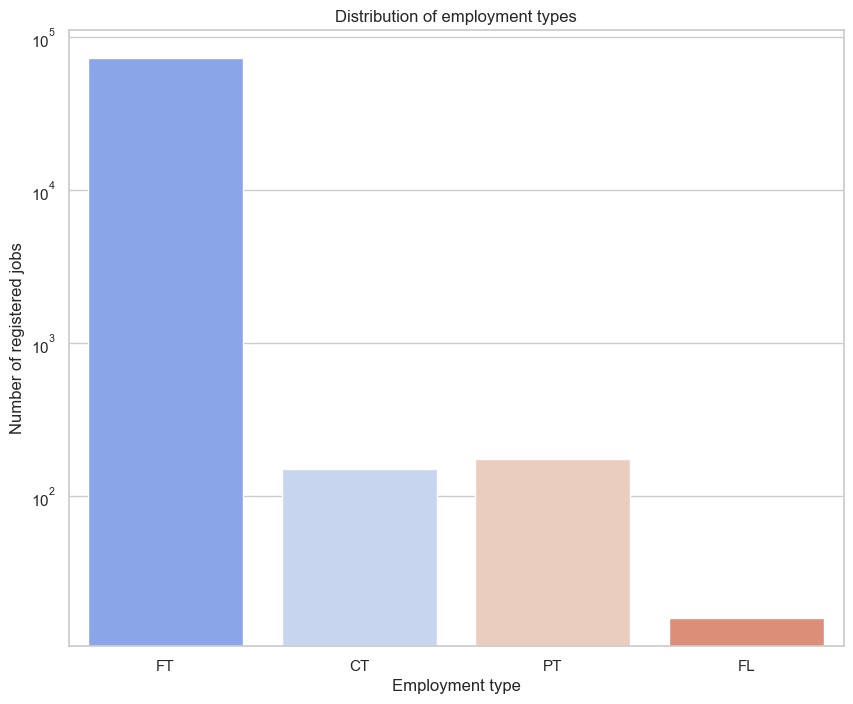

In [12]:
#Changing y axis to Log scale
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='employment_type', palette='coolwarm')
# Add labels and title
plt.yscale('log')
plt.title('Distribution of employment types')
plt.ylabel('Number of registered jobs')
plt.xlabel('Employment type')    

Full time employment is the most reported in the database, while freelancer is the least.

### Company size distributions


Text(0.5, 0, 'Company size')

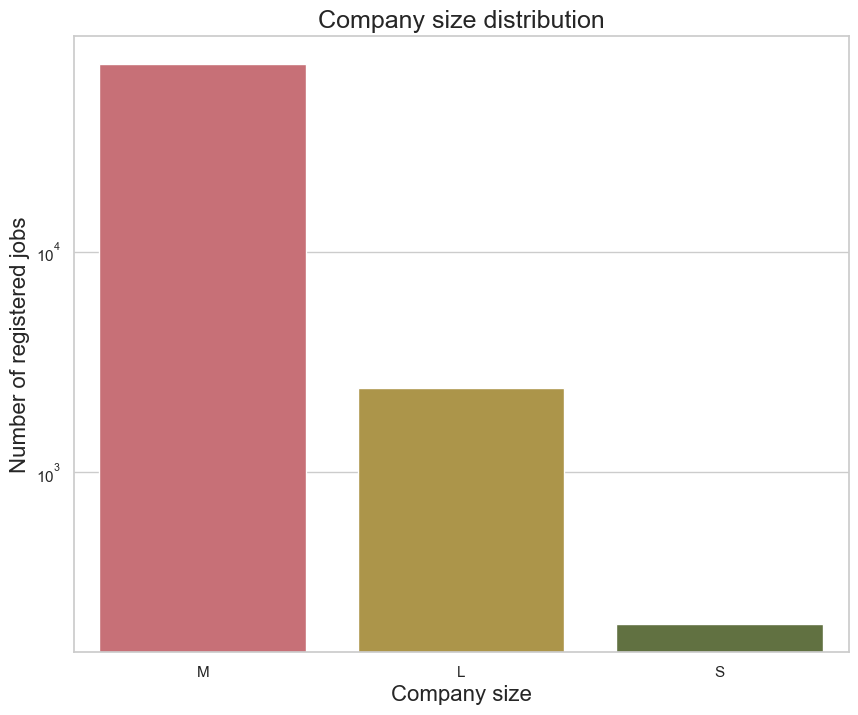

In [13]:
#Visualization of company size distribution
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x='company_size',palette='tab20b_r')
# Add labels and title
plt.yscale('log')
plt.title('Company size distribution',fontsize=18)
plt.ylabel('Number of registered jobs', fontsize=16)
plt.xlabel('Company size',fontdict={'fontsize':16})    

It seems that medium sized companies are the ones providing most of the job offers for data professions.

### Job titles

In [14]:
# Grouping by 'job_title' 
Job_positions = df.groupby('job_title').count()
Job_positions.shape


(289, 10)


There are 289 different job titles that will not fit in one graph, and we will only get a glimpse of the Top 10 positions.

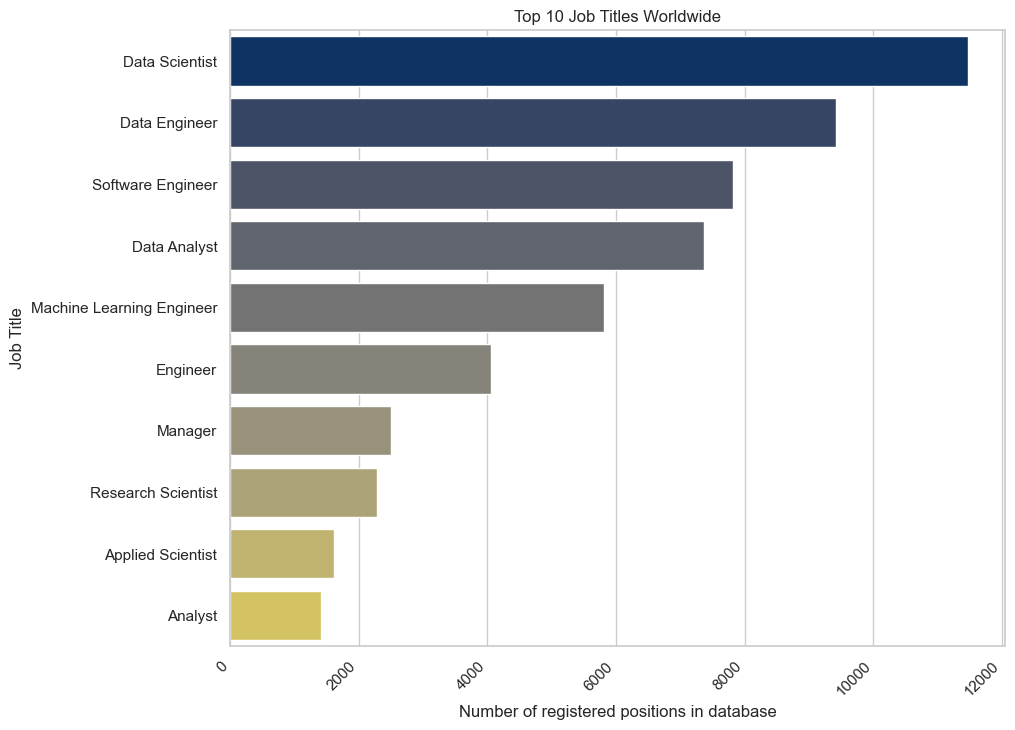

In [15]:
#Visualization of top 10 job positions
Top_10_positions = Job_positions.sort_values(by='work_year', ascending=False).head(10)

# Create the bar plot using sns.barplot
plt.figure(figsize=(10, 8))
sns.barplot(data=Top_10_positions, y=Top_10_positions.index, x='work_year',orient='h', palette='cividis')

# Add labels and title
plt.title('Top 10 Job Titles Worldwide')
plt.ylabel('Job Title')
plt.xlabel('Number of registered positions in database')

# Rotate the x-axis labels for better readability (if needed)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


Data Analyst job occupies the 4th position worldwide in the ranking of Data professions according to the database. 

<Axes: >

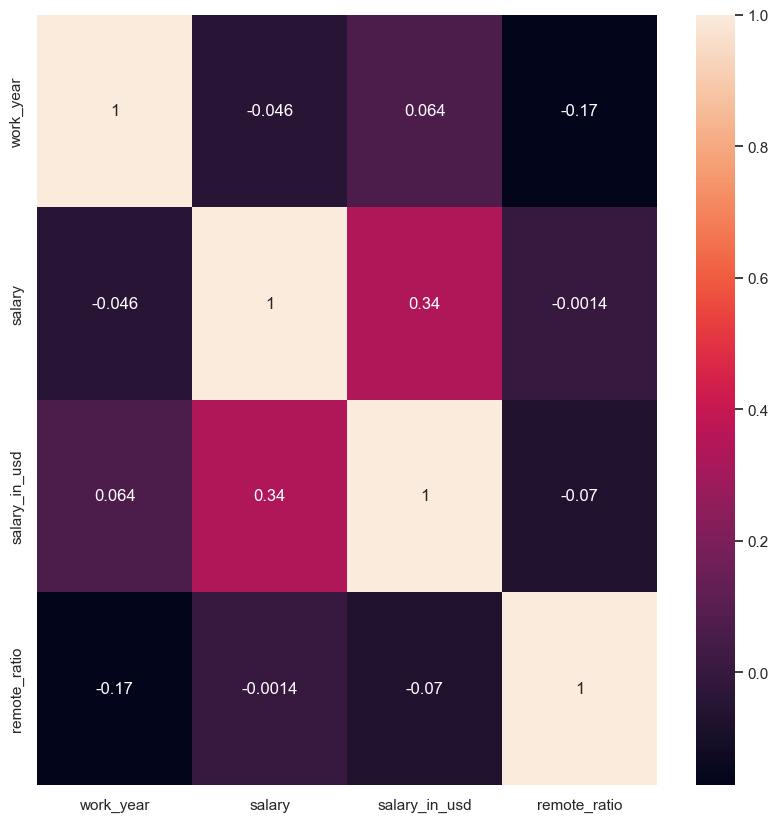

In [16]:
#Investigating correlation of numerical variables with heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot = True)


Salary variations are not strongly dependent on the remote ratio. In general there are weak correlations between the numerical variables with value lower than 0.5.


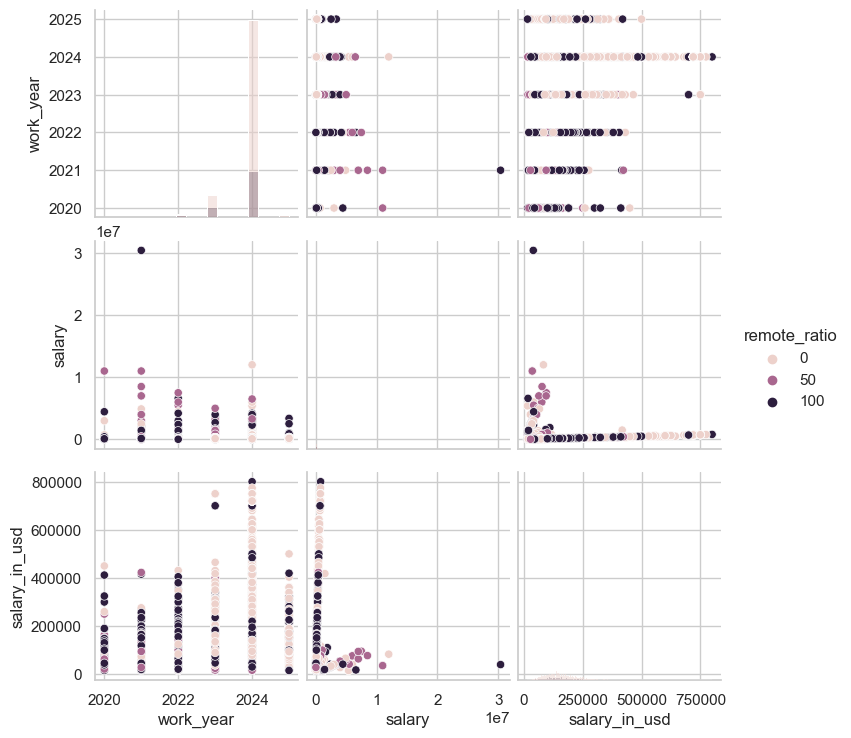

In [17]:
#Investigating visual correlation of numerical variables with pairplot

sns.pairplot(df, hue="remote_ratio", diag_kind="hist")

There aren't correlations  between the numerical variables in the  above graphs.



### `Data Analyst perspective`._ the following are jobs related to Analyst:

In [18]:
#Exploring the job positions suitable for Analysts         
df_analyst = df[df['job_title'].str.contains('Analy', case=False, na=False)]#str.contains does not work well with query command

# Group by 'job_title'
DA_group = df_analyst.groupby('job_title').count().sort_values(by='work_year', ascending=False)
DA_group.shape




(56, 10)

There are `56 job positions` related to Analysts, which could be attractive for a DA career shift. Their visualization goes as follows:

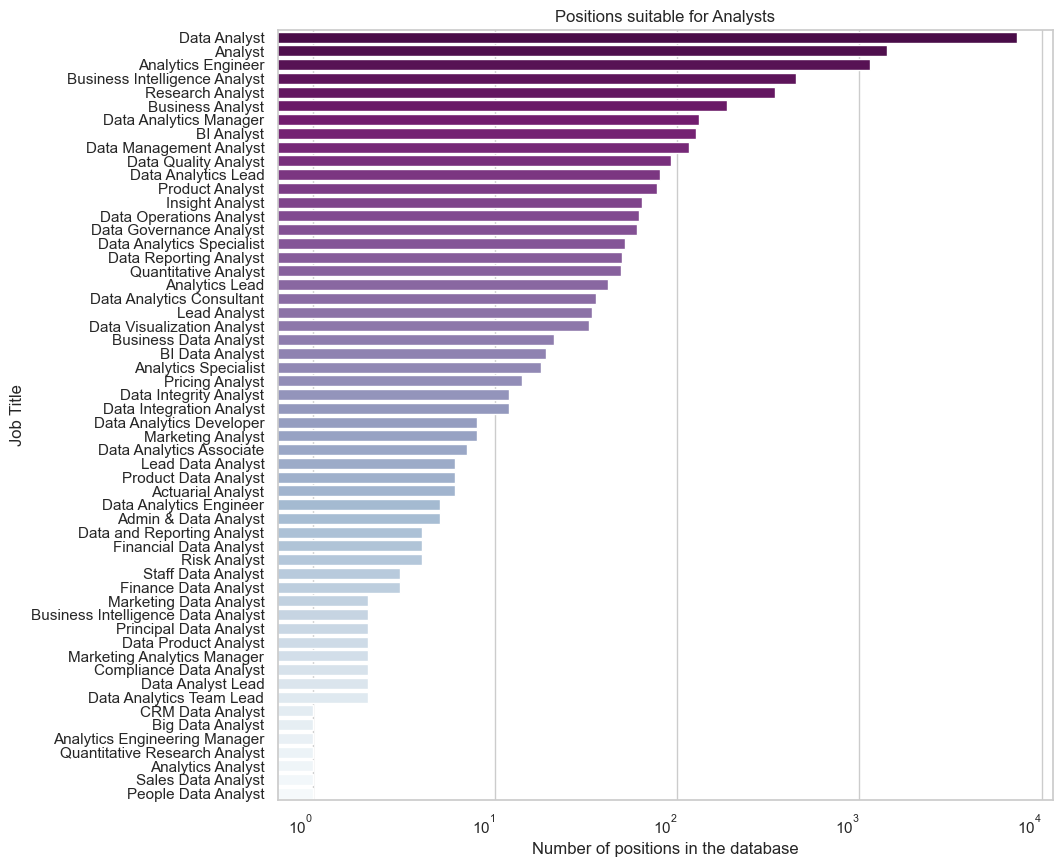

In [19]:
# Creating a bar plot using sns.barplot
plt.figure(figsize=(10, 10))
sns.barplot(data=DA_group, y=DA_group.index, x='work_year',orient='h', palette='BuPu_r')

# Add labels and title
plt.title('Positions suitable for Analysts')
plt.ylabel('Job Title')
plt.xlabel('Number of positions in the database')
plt.xscale('log')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Show the plot
plt.show()


Data Analyst job leads the Job titles for Analysts.

### Employment type



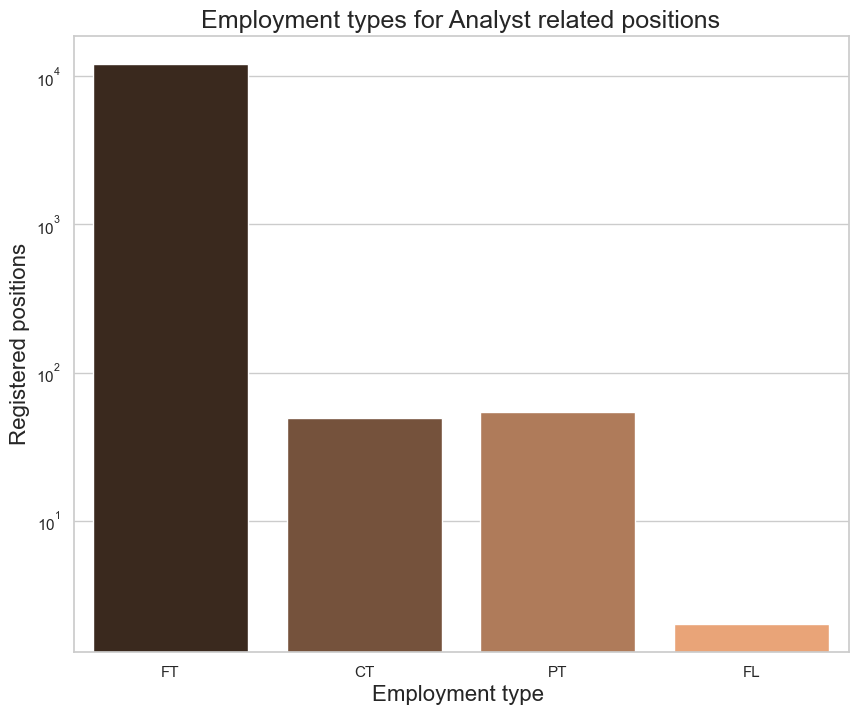

In [20]:
# Visualize distribution of Employment types for Analyst related job positions
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
sns.countplot(data=df_analyst,x='employment_type',palette='copper')
# Add labels and title
plt.yscale('log')#for better visibility
plt.title('Employment types for Analyst related positions', fontsize=18)
plt.ylabel('Registered positions',fontsize=16)
plt.xlabel('Employment type ', fontsize=16)

#show the plot
plt.show()


In [21]:
#Calculating proportions of employment type for a better visibility in graph
DA_employment2 = df_analyst['employment_type'].value_counts().reset_index()
# Rename columns for clarity
DA_employment2.columns = ['employment_type', 'count']
DA_employment2 = DA_employment2.sort_values(by='count', ascending=False)
# Calculate the percentages
DA_employment2['proportion (%)'] = round(DA_employment2['count'] / len(df_analyst) * 100, 1)

print(DA_employment2)

  employment_type  count  proportion (%)
0              FT  12092              99
1              PT     54               0
2              CT     49               0
3              FL      2               0


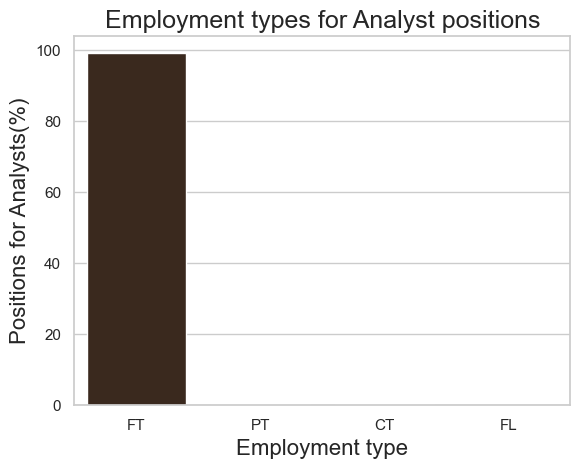

In [22]:
#Plot the % of employment type of the Analyst related job positions
sns.set_theme(style="whitegrid")
sns.barplot(data=DA_employment2,x='employment_type',y='proportion (%)', palette='copper')

# Add labels and title
plt.title('Employment types for Analyst positions',fontsize=18)
plt.ylabel('Positions for Analysts(%)',fontsize=16)
plt.xlabel('Employment type', fontsize=16)

plt.show()


<Figure size 800x800 with 0 Axes>

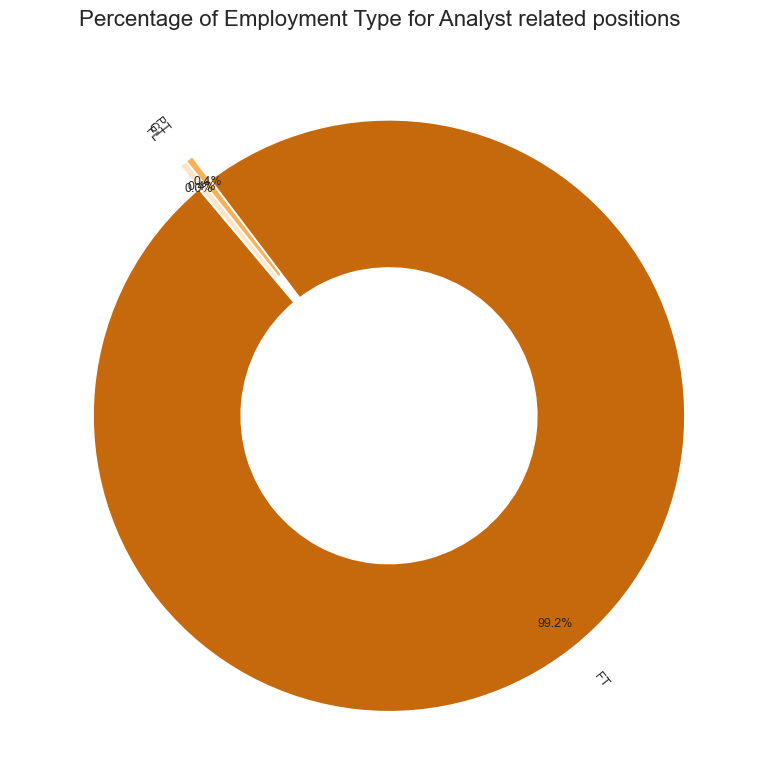

In [23]:
# Donut chart with customizations
plt.figure(figsize=(8, 8))
colors = sns.color_palette('PuOr')  
explode = (0.05, 0.05, 0.05,0.05)  # Slightly pull out each slice for emphasis

# Donut Chart 
plt.figure(figsize=(8, 8))

# Pie chart 
wedges, texts, autotexts = plt.pie(
    DA_employment2['proportion (%)'], 
    labels=DA_employment2['employment_type'], 
    autopct='%1.1f%%', 
    colors=colors, 
    explode=explode, 
    shadow=False,
    wedgeprops=dict(width=0.5, edgecolor='w'),
    pctdistance= 0.90,
    labeldistance=1.1,
    rotatelabels= True,
    textprops={'fontsize': 8},
    startangle=130,

)

# Circle definition in the center for the donut effect
centre_circle = plt.Circle((0,0), 0.4, fc='white')
plt.gca().add_artist(centre_circle)

# Beautify text
for text in texts + autotexts:
    text.set_fontsize(9)

plt.title('Percentage of Employment Type for Analyst related positions', fontsize=16)
plt.tight_layout()
plt.show()

Similar to the full set of Data professions, Full Time (FT) employment type is the dominant for the position related to Analysts. What positions exactly are included under Full Time employment type?

                             job_title  count
0                         Data Analyst   7289
1                              Analyst   1407
2                   Analytics Engineer   1138
3        Business Intelligence Analyst    445
4                     Research Analyst    343
5                     Business Analyst    187
6               Data Analytics Manager    132
7                           BI Analyst    125
8              Data Management Analyst    116
9                 Data Quality Analyst     93
10                 Data Analytics Lead     81
11                     Product Analyst     78
12                     Insight Analyst     64
13             Data Operations Analyst     62
14             Data Governance Analyst     60
15           Data Analytics Specialist     52
16              Data Reporting Analyst     50
17                Quantitative Analyst     49
18                      Analytics Lead     42
19           Data Analytics Consultant     35
20                        Lead Ana

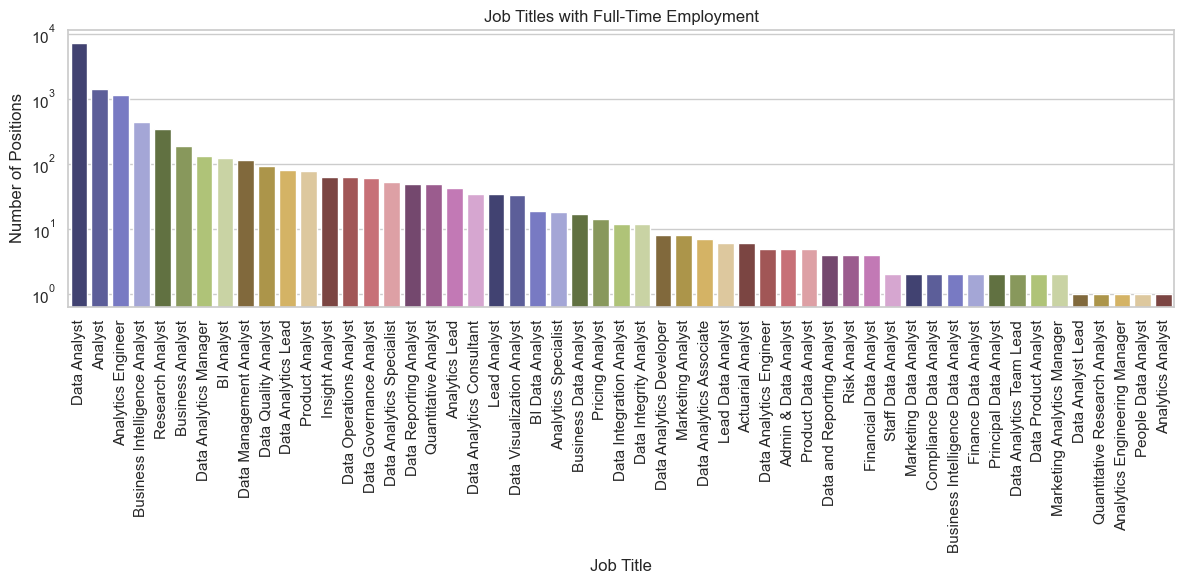

In [24]:
#Filter FT employment type
full_time_jobs = df_analyst[df_analyst['employment_type'] == 'FT']

# Count job titles for Full-Time employment
FT_job_title = full_time_jobs['job_title'].value_counts().reset_index()
FT_job_title.columns = ['job_title', 'count']

print(FT_job_title)

# Plot bar chart with the distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=FT_job_title, x='job_title', y='count', palette='tab20b')
plt.title('Job Titles with Full-Time Employment')
plt.xlabel('Job Title')
plt.ylabel('Number of Positions')
plt.yscale('log')
plt.xticks(rotation=90)  # Rotate for better readability
plt.tight_layout()
plt.show()


The Full time employment type is the most abundant, just like for all the data professions. 52 job titles from the 56 jobs suitable for Analysts have a full time employment type.

### Experience level

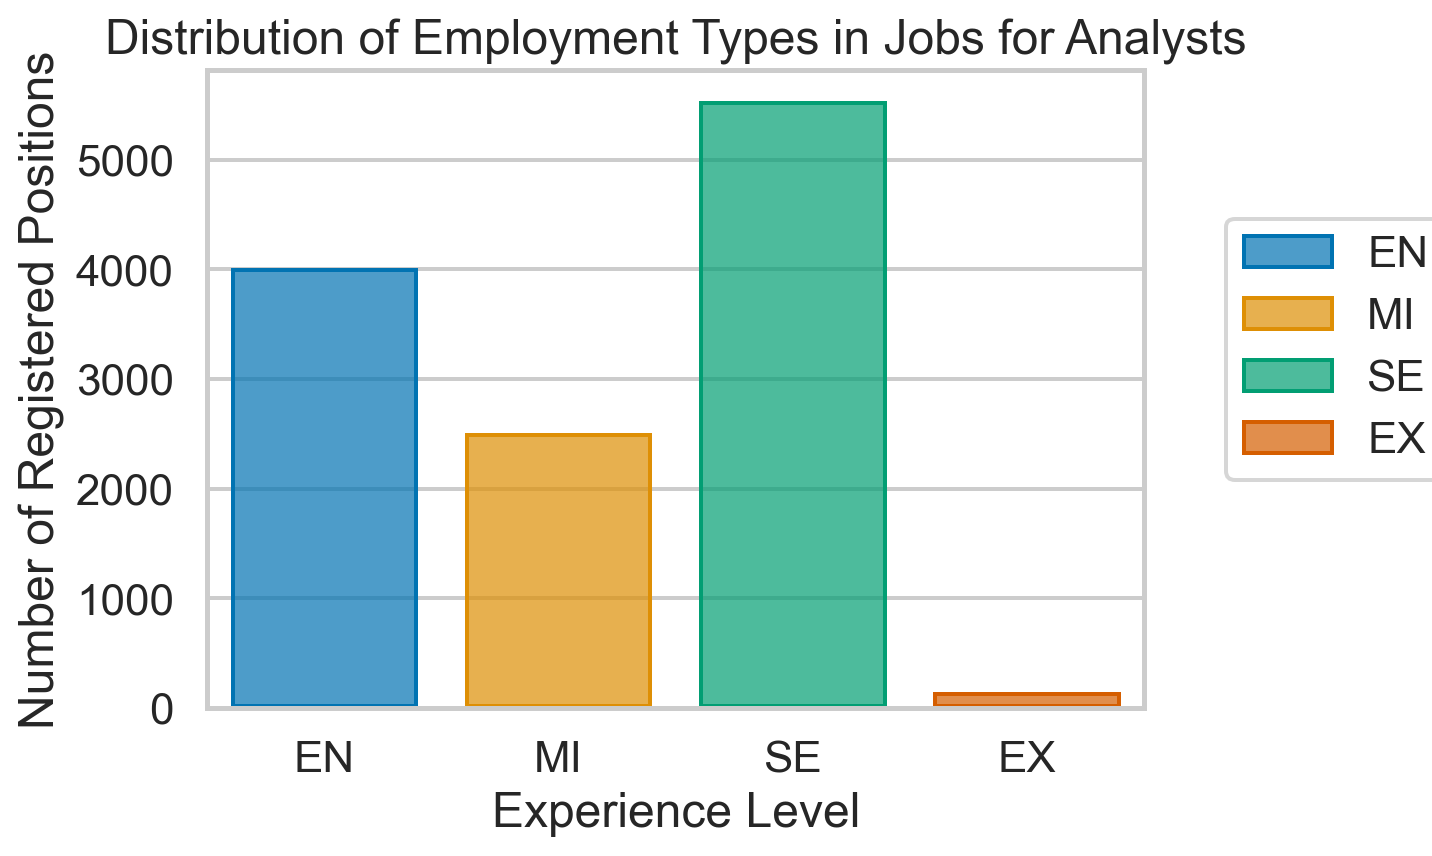

In [25]:
#Exploring the distribution of experience level for jobs for Analysts
from matplotlib import style
from seaborn import axes_style
from seaborn import plotting_context

p= (
    so.Plot(df_analyst, x="experience_level", color="experience_level").add(
    so.Bar(), so.Hist()
    ).scale(
    color="colorblind" 
    ).label(
    x="Experience Level",
    y="Number of Registered Positions",
    title="Distribution of Employment Types in Jobs for Analysts",
    legend=" ", color=""
    )
)
p

p.theme(axes_style("whitegrid") | plotting_context("talk"))

(SE) Senior experience is the most abundant followed by the Entry level (EN), which could be appealing for individuals assessing a shift to Analyst profile, but which job titles are associated to these experience levels?

Number of positions for Jr Analysts: (42, 2)
Number of positions for Senior Analysts: (42, 2)


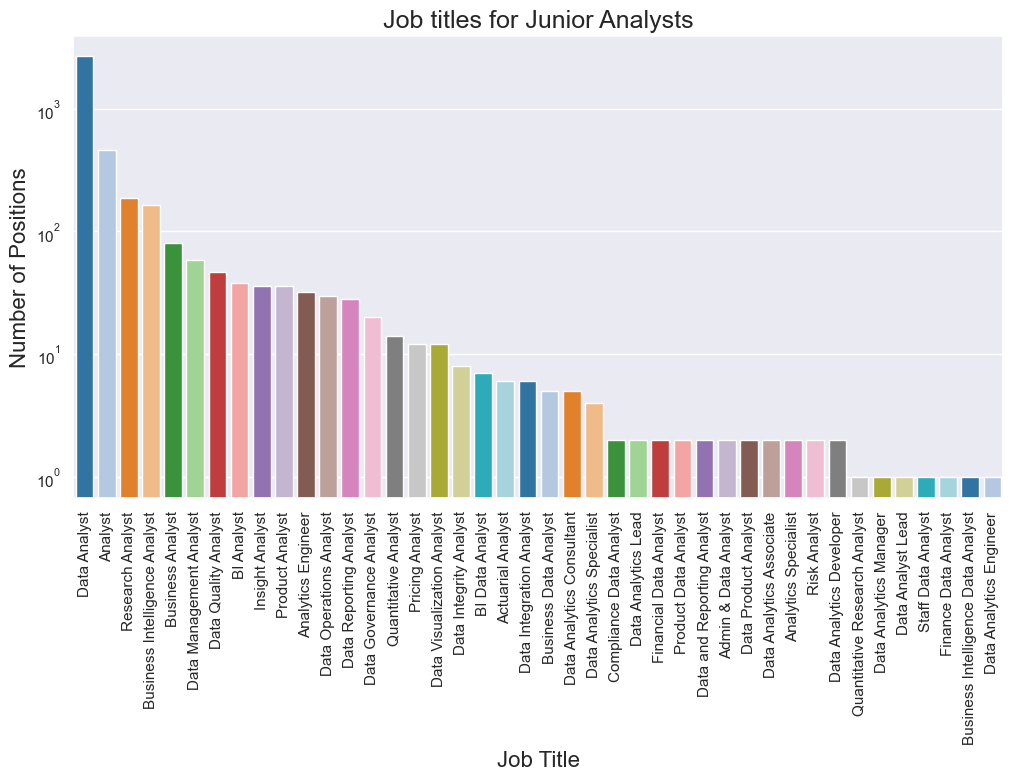

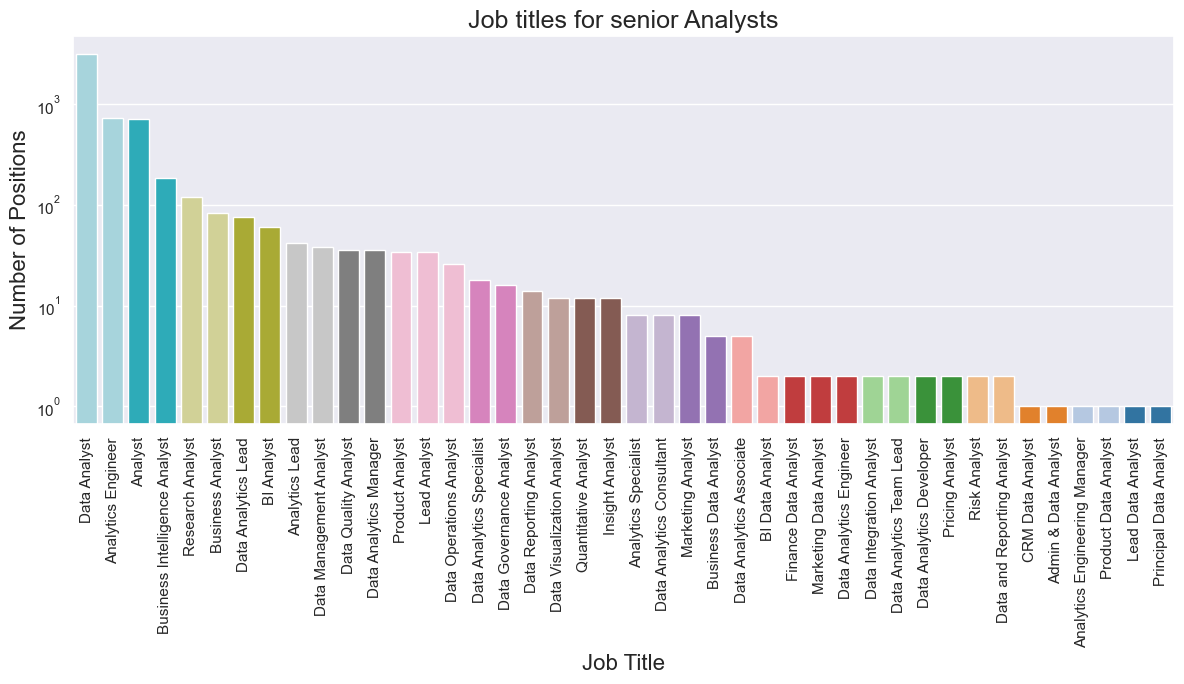

In [26]:
#Filter EN and SE employment type
EN_jobs = df_analyst[df_analyst['experience_level'] == 'EN']
SE_jobs = df_analyst[df_analyst['experience_level'] == 'SE']

# Count job titles for EN and SE employment
EN_job_title = EN_jobs['job_title'].value_counts().reset_index()
EN_job_title.columns = ['job_title', 'count']
print('Number of positions for Jr Analysts:',EN_job_title.shape)

SE_job_title = SE_jobs['job_title'].value_counts().reset_index()
SE_job_title.columns = ['job_title', 'count']
print('Number of positions for Senior Analysts:',SE_job_title.shape)

# Plot bar chart with the distribution
sns.set_theme()
# Junior positions (EN)
plt.figure(figsize=(12, 6))
sns.barplot(data=EN_job_title, x='job_title', y='count', palette='tab20')
plt.title('Job titles for Junior Analysts',fontsize=18)
plt.xlabel('Job Title',fontsize=16)
plt.ylabel('Number of Positions',fontsize=16)
plt.yscale('log')
plt.xticks(rotation=90)  # Rotate for better readability

# Senior positions (SE)
plt.figure(figsize=(12, 7))
sns.barplot(data=SE_job_title, x='job_title', y='count', palette='tab20_r')
plt.title('Job titles for senior Analysts',fontsize=18)
plt.xlabel('Job Title',fontsize=16)
plt.ylabel('Number of Positions',fontsize=16)
plt.yscale('log')
plt.xticks(rotation=90)  # Rotate for better readability

plt.tight_layout()
plt.show()

(DA) Data Analyst is a job that shows similar opportunities for Seniors and Juniors with 42 jobs for each experience level. However, the job titles differ between both groups.

### Salary distribution


In [27]:
#Overview of mean salaries in USD for Analysts related job positions
pd.set_option('display.float_format',lambda x: '%.0f' % x)
DA_salary = df_analyst.groupby('job_title')["salary_in_usd"].mean().sort_values(ascending=False)
DA_salary.head(15)


job_title
Analytics Engineering Manager   399880
Data Analytics Lead             171202
Data Analytics Team Lead        170000
Analytics Engineer              159269
Lead Analyst                    156587
Analytics Lead                  144356
Marketing Data Analyst          144327
Data Analytics Manager          143128
Finance Data Analyst            141934
Data Product Analyst            135170
Quantitative Analyst            132761
Product Analyst                 131086
Principal Data Analyst          122500
Research Analyst                118580
Data Governance Analyst         117992
Name: salary_in_usd, dtype: float64

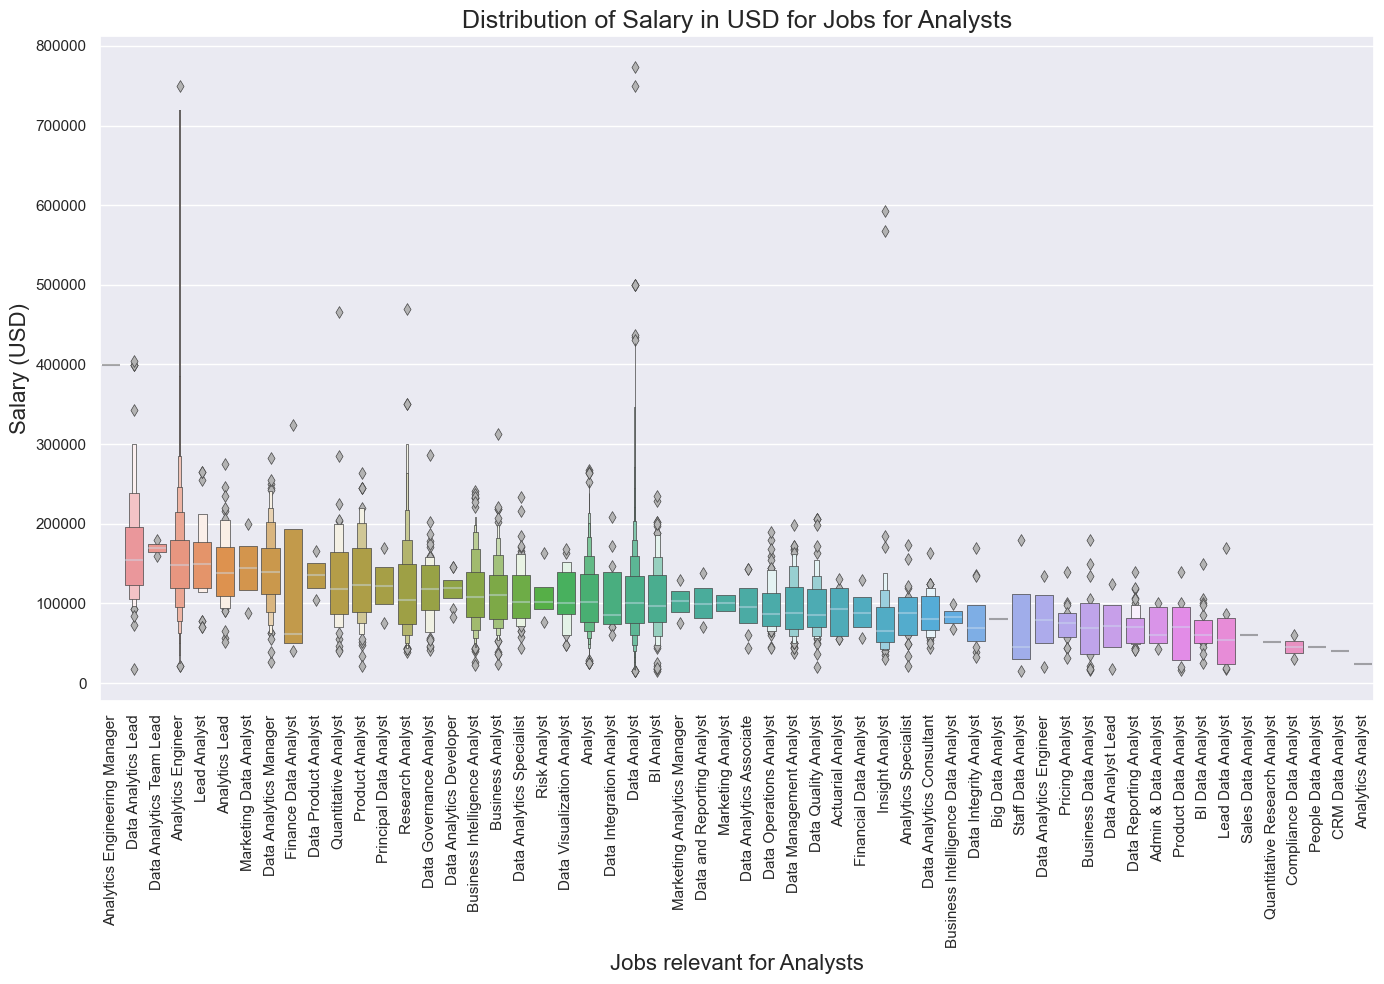

In [28]:
#Plotting distribution of salary in usd for jobs suitable to analysts
plt.figure(figsize=(14, 10))
job_order=df_analyst.groupby('job_title')["salary_in_usd"].mean().sort_values(ascending=False).index
sns.boxenplot(data=df_analyst, x="job_title",
              y='salary_in_usd',
              showfliers=True,
              line_kws=dict(linewidth=1.5, color="#cde"),
              flier_kws=dict(facecolor=".7",linewidth=.5),
              linewidth=.5,
              order=job_order,
              )
# Customize the plot
plt.title('Distribution of Salary in USD for Jobs for Analysts', fontsize=18)
plt.xlabel('Jobs relevant for Analysts',fontsize=16)
plt.ylabel('Salary (USD)',fontsize=16)
plt.xticks(rotation=90)  # Rotate job titles for better readability
plt.tight_layout()
plt.show()

In [29]:
print('Mean salary in USD for Data Analyst:',DA_salary.loc["Data Analyst"])

Mean salary in USD for Data Analyst: 106715.12415104591


 Analyst Engineering Manager is leading the salaries with an income of ca.400K USD, while `Data Analyst earn ca.107K USD`.

It seems that several jobs suitable for analysts have a salary below the 200K USD.

What about the salary of the `top 10 jobs for analysts?`

In [30]:
#Listing the top 10 jobs for Analysts (most common job titles)
T10_DA= df_analyst['job_title'].value_counts().head(10)

print(T10_DA)

Data Analyst                     7362
Analyst                          1417
Analytics Engineer               1138
Business Intelligence Analyst     449
Research Analyst                  345
Business Analyst                  189
Data Analytics Manager            132
BI Analyst                        127
Data Management Analyst           116
Data Quality Analyst               93
Name: job_title, dtype: int64


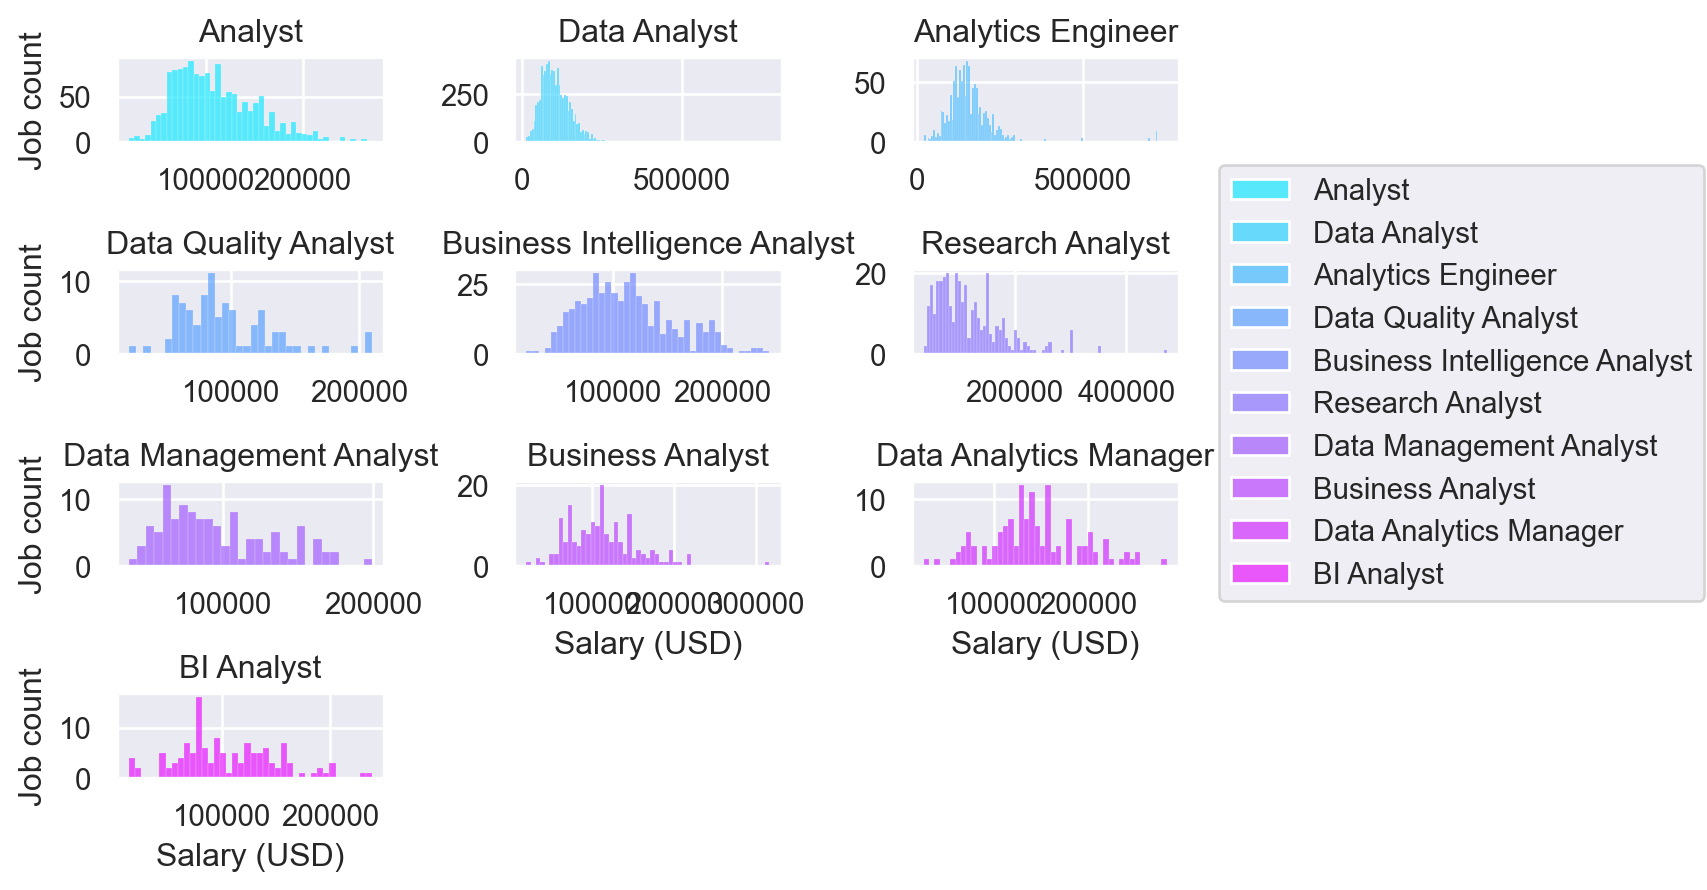

<Figure size 1400x2000 with 0 Axes>

In [31]:
#Option 1: Visualizing distribution of salaries for Top 10 jobs suited to Analysts
Top10_JobTitleA=['Data Analyst', 'Analyst','Analytics Engineer', 'Business Intelligence Analyst', 'Research Analyst', 'Business Analyst', 'Data Analytics Manager', 'BI Analyst', 'Data Management Analyst', 'Data Quality Analyst']
Top_10_AJobs= df_analyst[df_analyst['job_title'].isin(Top10_JobTitleA)]

#Subplots of salaries in USD
plt.figure(figsize=(14, 20))
(
    so.Plot(Top_10_AJobs, x="salary_in_usd")
    .facet(col="job_title", wrap=3)
    .add(so.Bars(), so.Hist(), color="job_title")
    .share(x=False,y=False)
    .scale(color="cool")
    .label(
        y="Job count", x="Salary (USD)",
        color= "", legend=None
    )
)

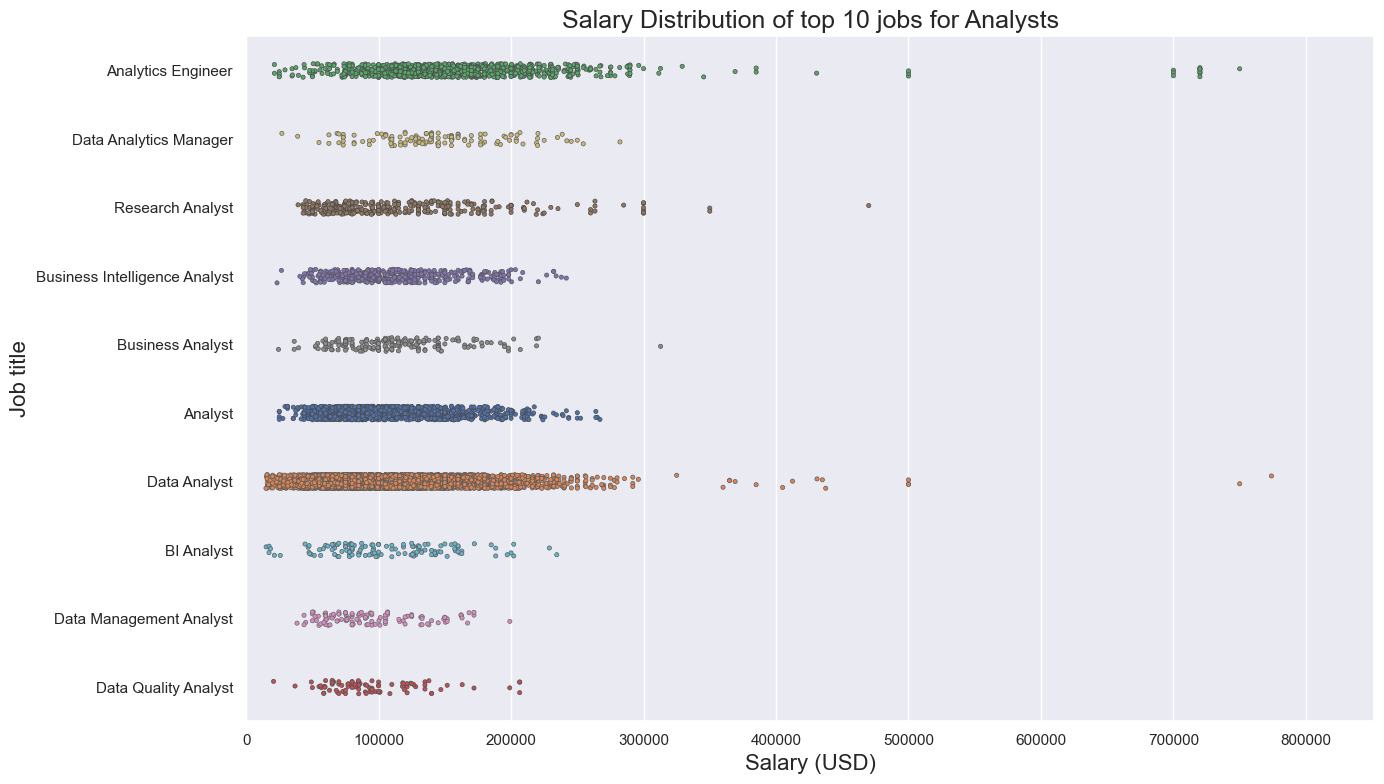

In [32]:
#Option 2 for salary visualization in top 10 jobs for analysts

#Descending order of mean salaries 
salary_order=Top_10_AJobs.groupby('job_title')["salary_in_usd"].mean().sort_values(ascending=False).index

# Boxen plot for salary distribution with improved visibility
plt.figure(figsize=(14, 8))

sns.stripplot(data=Top_10_AJobs, y="job_title", x="salary_in_usd",
              legend=False,linewidth=.5,order=salary_order, size=3,
              hue="job_title")
# Customization for better visibility
plt.title('Salary Distribution of top 10 jobs for Analysts', fontsize=18)
plt.ylabel('Job title', fontsize=16)
plt.xlabel('Salary (USD)', fontsize=16)
#plt.xticks(rotation=90, ha='right')  # Rotate labels for readability
plt.xlim(0, Top_10_AJobs['salary_in_usd'].max() * 1.1)  # Adjust x-axis for clarity
plt.tight_layout()
plt.show()

In [33]:
Top_10_AJobs.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,11368,11368,11368,11368
mean,2024,116748,113310,26
std,1,120979,53793,44
min,2020,14400,15000,0
25%,2024,76875,77000,0
50%,2024,105000,105000,0
75%,2024,140000,140000,100
max,2025,6000000,774000,100


The mean salary (USD) for the top 10 jobs for analysts lies around 113K USD (worldwide wise).

### Remote ratio

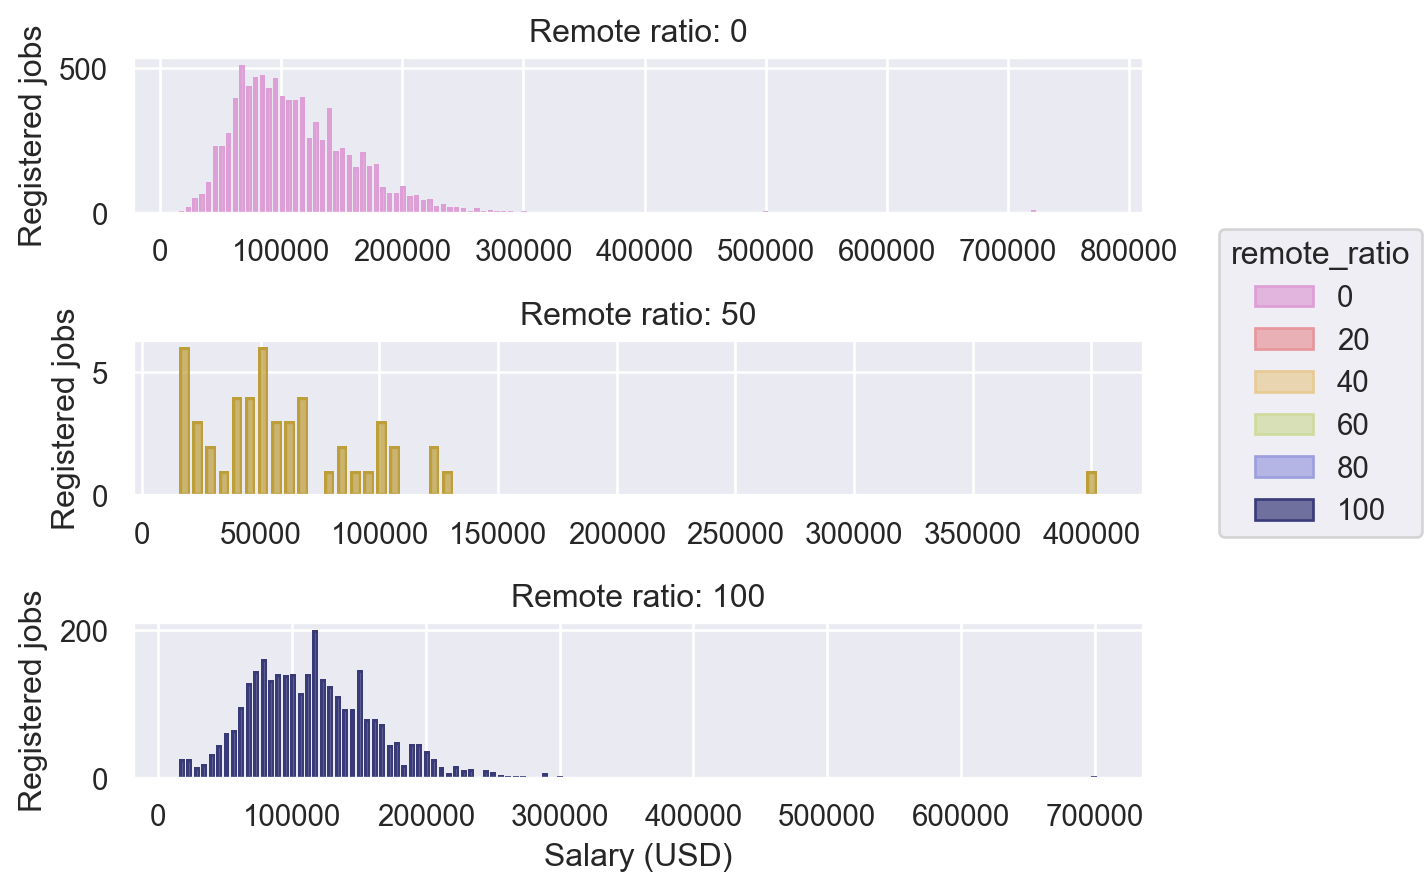

<Figure size 1000x800 with 0 Axes>

In [34]:
#Visualizing distribution of Remote ratio for jobs suited to Analysts

plt.figure(figsize=(10, 8))
(
    so.Plot(df_analyst, x="salary_in_usd",color="remote_ratio")
    .facet("remote_ratio",wrap=1)
    .add(so.Bar(), so.Hist())
    .share(x=False,y=False)
    .scale(color="tab20b_r")
    .label(
        x="Salary (USD)", y="Registered jobs",
        col="Remote ratio:"
    )
)


Work on site and fully remote are the dominant modalities for Analysts. What positions are related to Remote or hybrid work for the Top 10 jobs for Analysts?

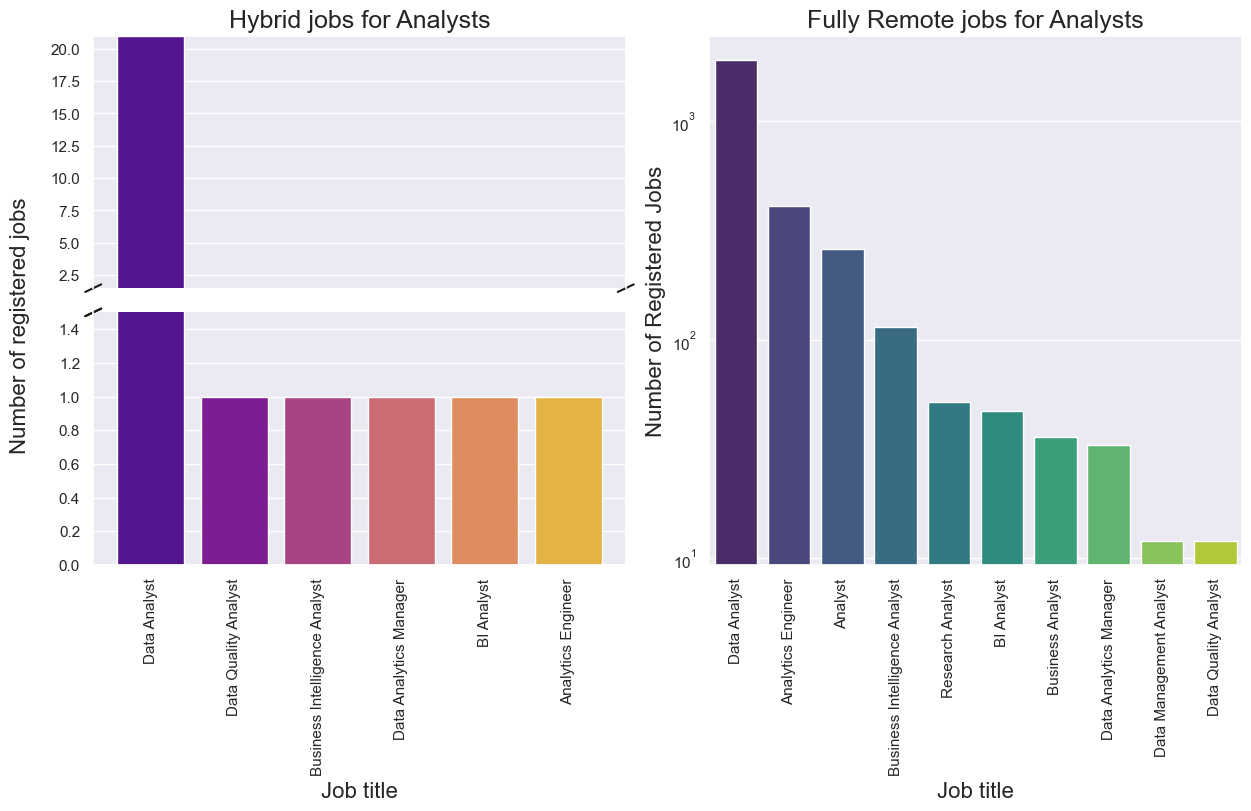

In [35]:
#Visualizing the frequencies of Hybrid and remote jobs for Top 10 Analysts related jobs

#Filter fully remote (remote ratio=100) and hybrid (remote ratio=50)
Remote_jobs = Top_10_AJobs[Top_10_AJobs['remote_ratio'] == 100]
Hybrid_jobs = Top_10_AJobs[Top_10_AJobs['remote_ratio'] == 50]

#Order the job titles by frequency of remote ratio for the plot
Remote_sorted = Remote_jobs['job_title'].value_counts().sort_values(ascending=False).index
Hybrid_sorted = Hybrid_jobs['job_title'].value_counts().sort_values(ascending=False).index

sns.set_style('darkgrid')

# Define subplot mosaic layout
fig, axd = plt.subplot_mosaic(
    """
    ac
    bc
    """, figsize=(12, 8), layout="constrained"
)

# HYBRID JOBS WITH A BREAK LINE (axd['a'] & axd['b'])
break_point = 1.5  # Adjust based on data distribution

# Top plot (larger values) → axd['a']
sns.countplot(Hybrid_jobs, x="job_title", ax=axd['a'], palette='plasma', order=Hybrid_sorted)
axd['a'].set_ylim(break_point, Hybrid_jobs['job_title'].value_counts().max())
axd['a'].spines['bottom'].set_visible(False)

# Bottom plot (smaller values) → axd['b']
sns.countplot(Hybrid_jobs, x="job_title", ax=axd['b'], palette='plasma', order=Hybrid_sorted)
axd['b'].set_ylim(0, break_point)
axd['b'].spines['top'].set_visible(False)
axd['b'].set_xlabel('Job Title')

# Add the break marks
d = 0.015  # Break size
kwargs = dict(transform=axd['a'].transAxes, color='k', clip_on=False)
axd['a'].plot((-d, +d), (-d, +d), **kwargs)  # Top left
axd['a'].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top right

kwargs.update(transform=axd['b'].transAxes)
axd['b'].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom left
axd['b'].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom right

# Titles and labels
axd['a'].set_title('Hybrid jobs for Analysts',fontsize=18)
axd['a'].set_xlabel('')
axd['a'].set_xticklabels('')
axd['a'].set_ylabel('')
axd['b'].set_ylabel('')
axd['b'].set_xlabel('Job title', fontsize=16)
axd['b'].tick_params(axis='x', labelrotation=90)
# Set a single y-label spanning both subplots
fig.text(-0.03, 0.6, 'Number of registered jobs', va='center', rotation=90, fontsize=16)

# REMOTE JOBS (axd['c'] - spans both rows on the right)
sns.countplot(Remote_jobs, x="job_title", ax=axd['c'], palette='viridis', order=Remote_sorted)
axd['c'].set_title('Fully Remote jobs for Analysts',fontsize=18)
axd['c'].set_xlabel('Job title',fontsize=16)
axd['c'].set_ylabel('Number of Registered Jobs',fontsize=16)
axd['c'].tick_params(axis='x', labelrotation=90)

# Set log scale for better visualization
axd['c'].set_yscale('log')

# Show plot
plt.show()


Hybrid work is reported mainly for DA. Is it possible to see the change in remote ratio over time for the Top 10 jobs for Analysts?

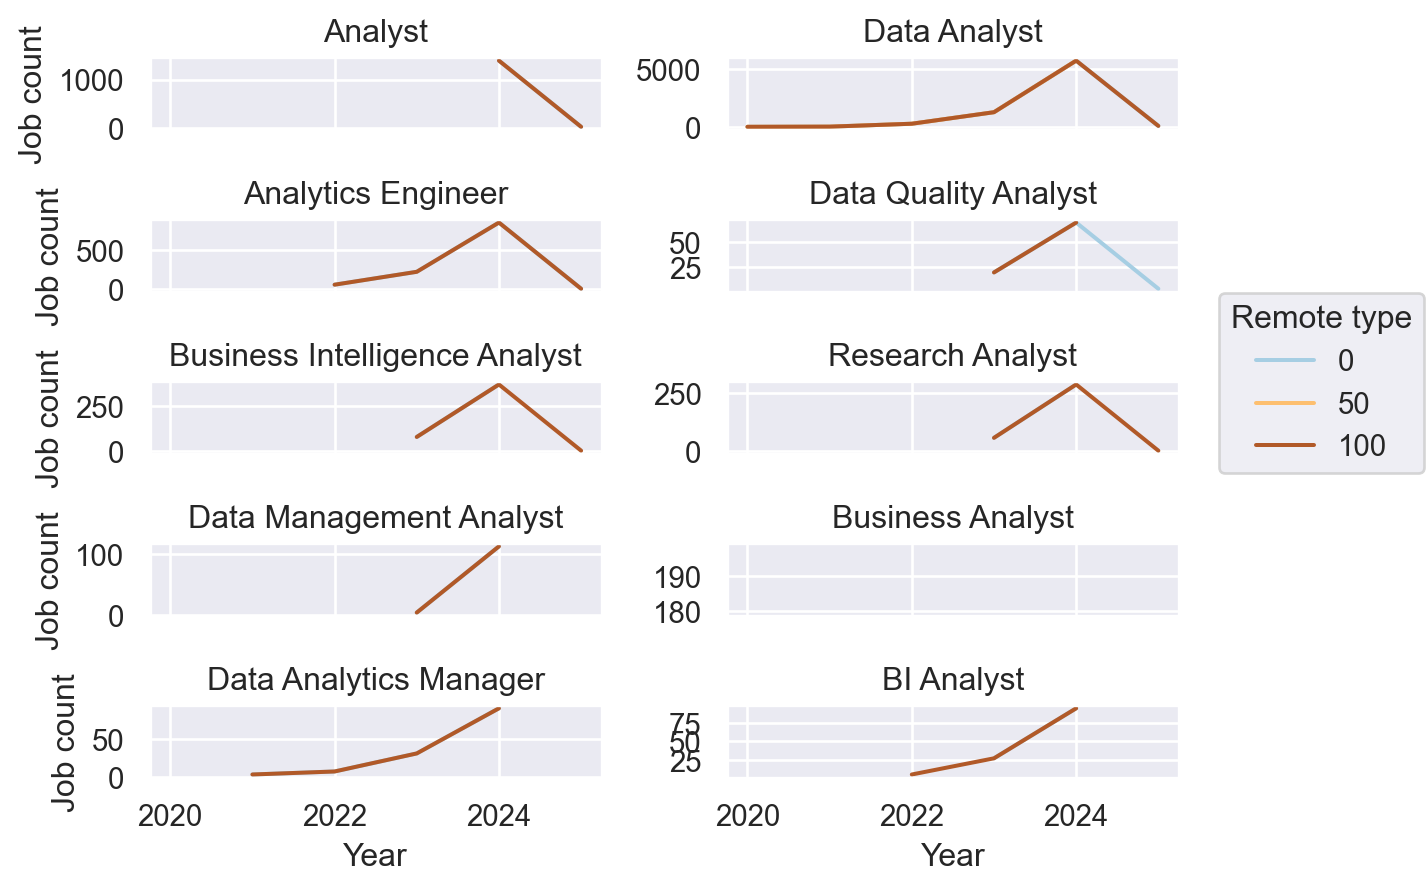

In [36]:
#Option 1 to see the evolution of remote jobs for analysts in subplots
 
# Compute job counts per job title and work year
job_counts = Top_10_AJobs.groupby(['job_title', 'work_year']).size().reset_index(name='job_count')

# Ensure we modify Top_10_AJobs safely by creating a full copy
Top_10_AJobscopy = Top_10_AJobs.copy()

# Use .loc[] to safely assign job counts by merging
Top_10_AJobscopy.loc[:, 'job_count'] = Top_10_AJobscopy.set_index(['job_title', 'work_year']).index.map(
    job_counts.set_index(['job_title', 'work_year'])['job_count']
)

#Create the plot
(
    so.Plot(Top_10_AJobscopy, x="work_year", y="job_count",color="remote_ratio")
    .facet(col="job_title", wrap=2)
    .add(so.Line())
    .share(x=True,y=False)
    .scale(
        color=so.Continuous("Paired", norm=(0, 100))
            .tick(upto=3).label(), 
        )
    .label(
       y="Job count", x="Year",
       color="Remote type",  # Sets correct legend title
    )
)

The count of remote jobs becomes noticeable from the year 2022 onwards. Perhaps this modality boomed after the Corona pandemy.

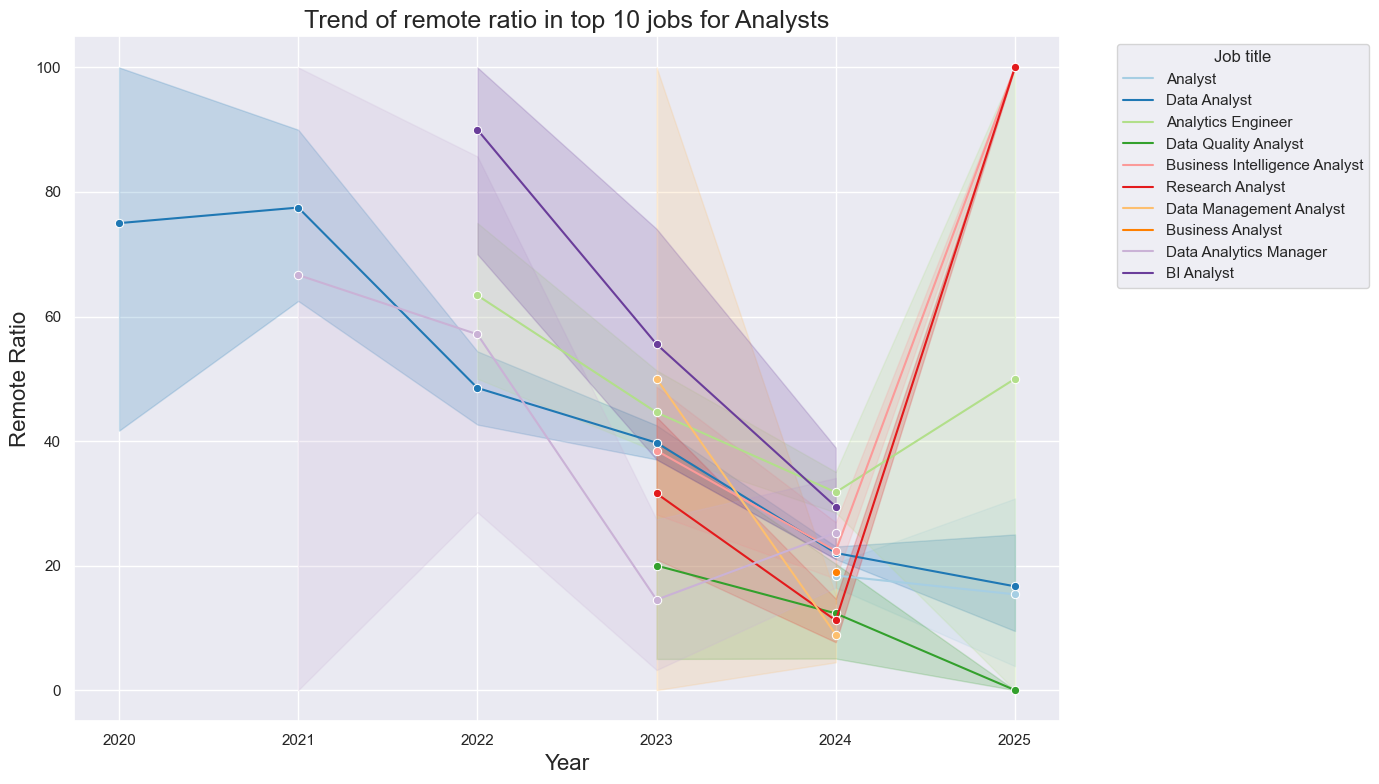

In [37]:
#Option 2 in a time series

plt.figure(figsize=(14, 8))
sns.lineplot(data=Top_10_AJobs, x="work_year", y="remote_ratio", hue="job_title", marker="o",estimator="mean",errorbar=('ci',95),palette="Paired")
plt.title('Trend of remote ratio in top 10 jobs for Analysts',fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Remote Ratio',fontsize=16)
plt.legend(title="Job title", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In 2023 more professions suitable for Analysts had some remote work at some extent, however their remote ratio decreased in 2024, with exception of "Data Analytics Manager". As of January of 2025, the jobs of Research Analyst and Business Inteligence Analyst led the fully remote roles.

### Exploring `correlations` in the filtered data frame for Analyst positions

As there was no visible correlation between the numerical values from the general screening, some categorical data will be transformed.

In [38]:
#Transformation of categorical data with Get Dummies command
from sklearn.preprocessing import LabelEncoder

# Nominal data  transformation with One-hot encoding
df_analyst2= pd.get_dummies(df_analyst, columns=['employment_type', 'company_size', 'experience_level'], drop_first=False)
print (df_analyst2.dtypes)

# Label encode experience level and company size (assuming order: Entry < Mid < Senior < Executive,
                                       #Small< Medium< Large, and Freelancer < Contract < Part-time < Full-time)

exp_order = ['EN', 'MI', 'SE', 'EX']
size_order = ['S','M','L']

# Assign numeric codes based on order
df_analyst2['experience_encoded'] = df_analyst['experience_level'].astype('category').cat.set_categories(exp_order).cat.codes
encoder = LabelEncoder()
encoded_exp = encoder.fit_transform(['EN', 'MI', 'SE','EX'])
print(encoded_exp)

df_analyst2['company_size_encoded'] = df_analyst['company_size'].astype('category').cat.set_categories(size_order).cat.codes
encoder = LabelEncoder()
encoded_size = encoder.fit_transform(['S', 'M', 'L'])
#print(encoded_size)





work_year               int64
job_title              object
salary                  int64
salary_currency        object
salary_in_usd           int64
employee_residence     object
remote_ratio            int64
company_location       object
employment_type_CT      uint8
employment_type_FL      uint8
employment_type_FT      uint8
employment_type_PT      uint8
company_size_L          uint8
company_size_M          uint8
company_size_S          uint8
experience_level_EN     uint8
experience_level_EX     uint8
experience_level_MI     uint8
experience_level_SE     uint8
dtype: object
[0 2 3 1]


In [39]:
#Visualizing the new numeric columns
df_analyst2.tail(10)

,work_year,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,employment_type_CT,employment_type_FL,...,employment_type_PT,company_size_L,company_size_M,company_size_S,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,experience_encoded,company_size_encoded
73232,2020,Data Analyst,85000,USD,85000,US,100,US,0,0,...,0,1,0,0,0,0,1,0,1,2
73246,2020,BI Data Analyst,98000,USD,98000,US,0,US,0,0,...,0,0,1,0,0,0,1,0,1,1
73250,2021,Data Analytics Manager,120000,USD,120000,US,0,US,0,0,...,0,1,0,0,0,0,0,1,2,2
73265,2021,Data Analytics Manager,140000,USD,140000,US,100,US,0,0,...,0,1,0,0,0,0,0,1,2,2
73268,2021,Finance Data Analyst,45000,GBP,61896,GB,50,GB,0,0,...,0,1,0,0,0,0,0,1,2,2
73276,2021,Business Data Analyst,50000,EUR,59102,LU,100,LU,0,0,...,0,1,0,0,1,0,0,0,0,2
73286,2021,Lead Data Analyst,1450000,INR,19609,IN,100,IN,0,0,...,0,1,0,0,0,0,1,0,1,2
73287,2021,Data Analyst,75000,USD,75000,US,0,US,0,0,...,0,1,0,0,0,0,1,0,1,2
73288,2021,Data Analyst,62000,USD,62000,US,0,US,0,0,...,0,1,0,0,0,0,1,0,1,2
73304,2020,Business Data Analyst,100000,USD,100000,US,100,US,1,0,...,0,1,0,0,1,0,0,0,0,2


In [40]:
#Elimination of individual columns Company_size and Experience_level, which are summarized in the corresponding encoded columns
df_analyst3=df_analyst2.drop(columns=['company_size_S','company_size_M','company_size_L', 'salary','experience_level_EN','experience_level_MI','experience_level_SE','experience_level_EX'],inplace=False)
df_analyst3.head()

,work_year,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,experience_encoded,company_size_encoded
14,2025,Analyst,USD,161990,US,0,US,0,0,1,0,0,1
15,2025,Analyst,USD,89990,US,0,US,0,0,1,0,0,1
20,2025,Data Analyst,USD,160850,US,0,US,0,0,1,0,1,1
21,2025,Data Analyst,USD,96600,US,0,US,0,0,1,0,1,1
22,2025,Analyst,USD,105000,US,0,US,0,0,1,0,2,1


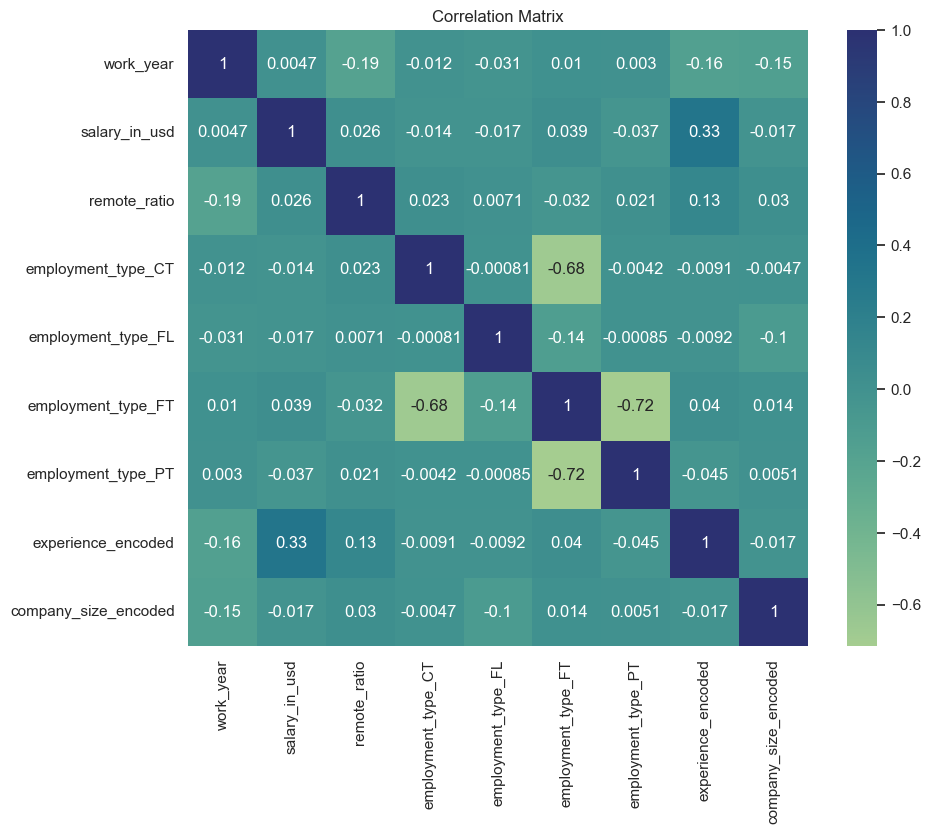

In [41]:
# Check correlation matrix with the new data frame
correlation_matrix = df_analyst3.corr(numeric_only=True)

# Option 1: Visualize with a full heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='crest', annot=True)
plt.title('Correlation Matrix')
plt.show()

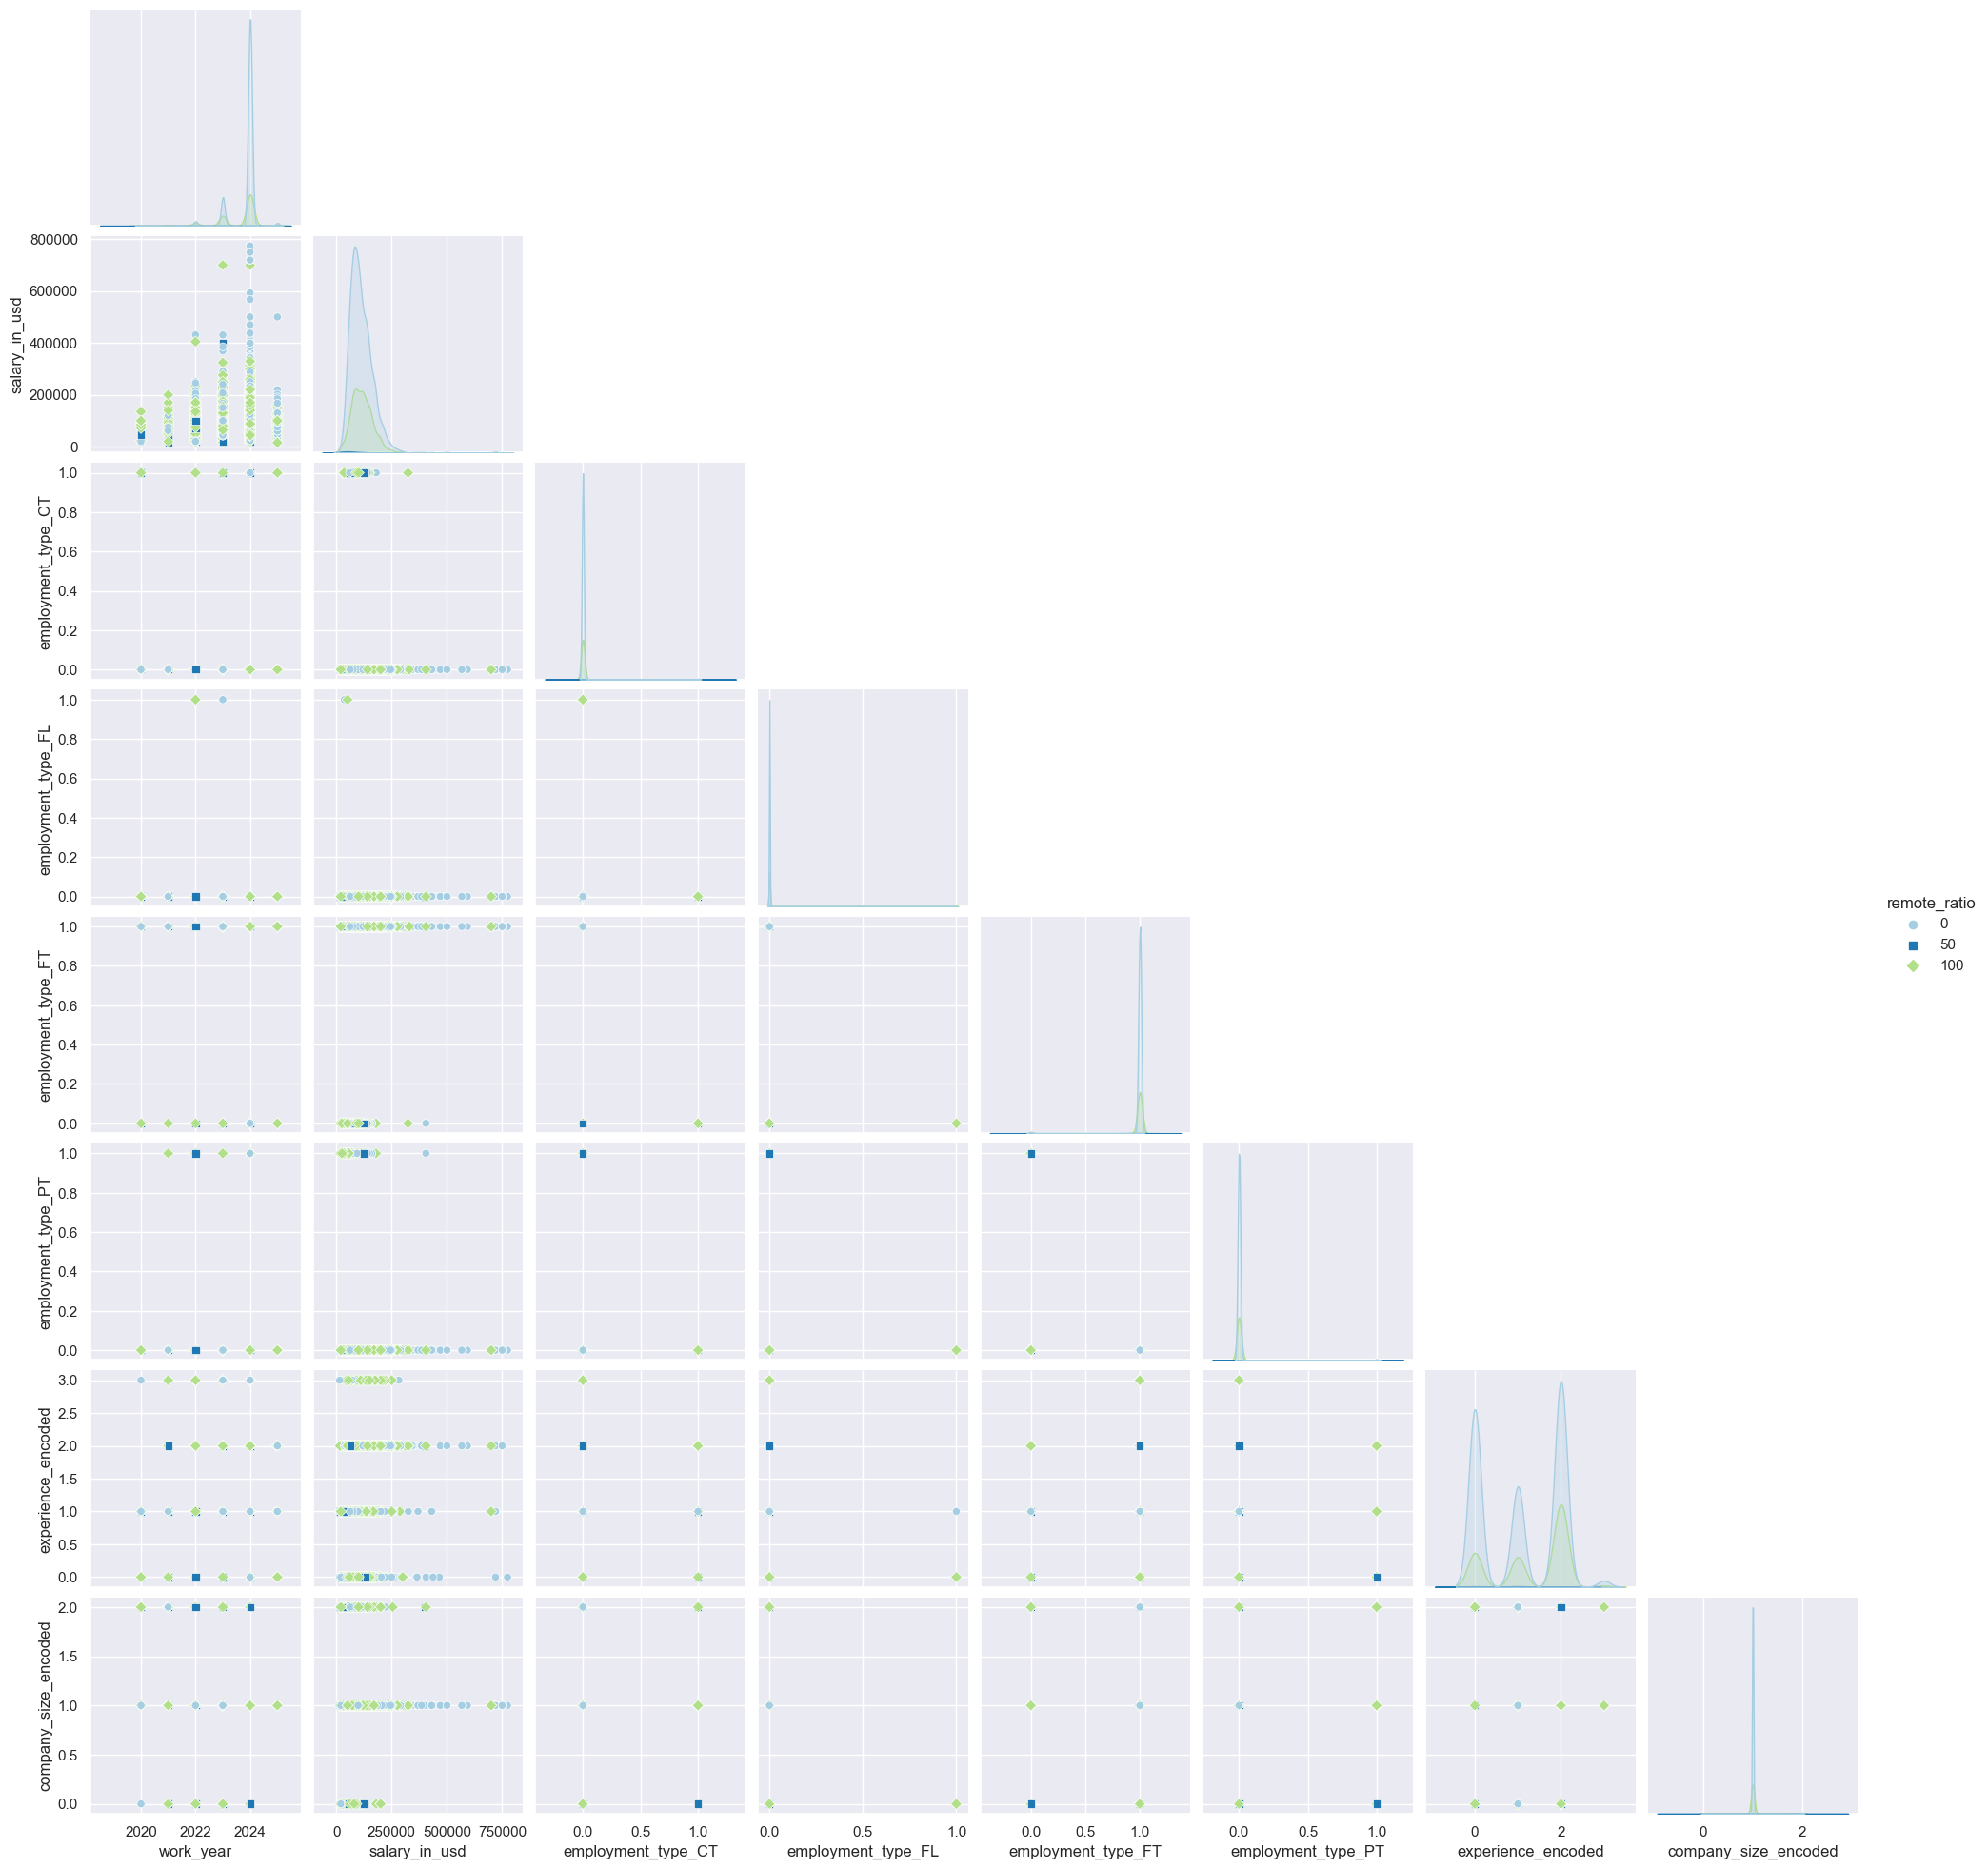

In [42]:
# Option 2: Visualize with a pairplot
sns.pairplot(df_analyst3, hue="remote_ratio", diag_kind="kde", markers=["o", "s", "D"], corner= True,palette="Paired")

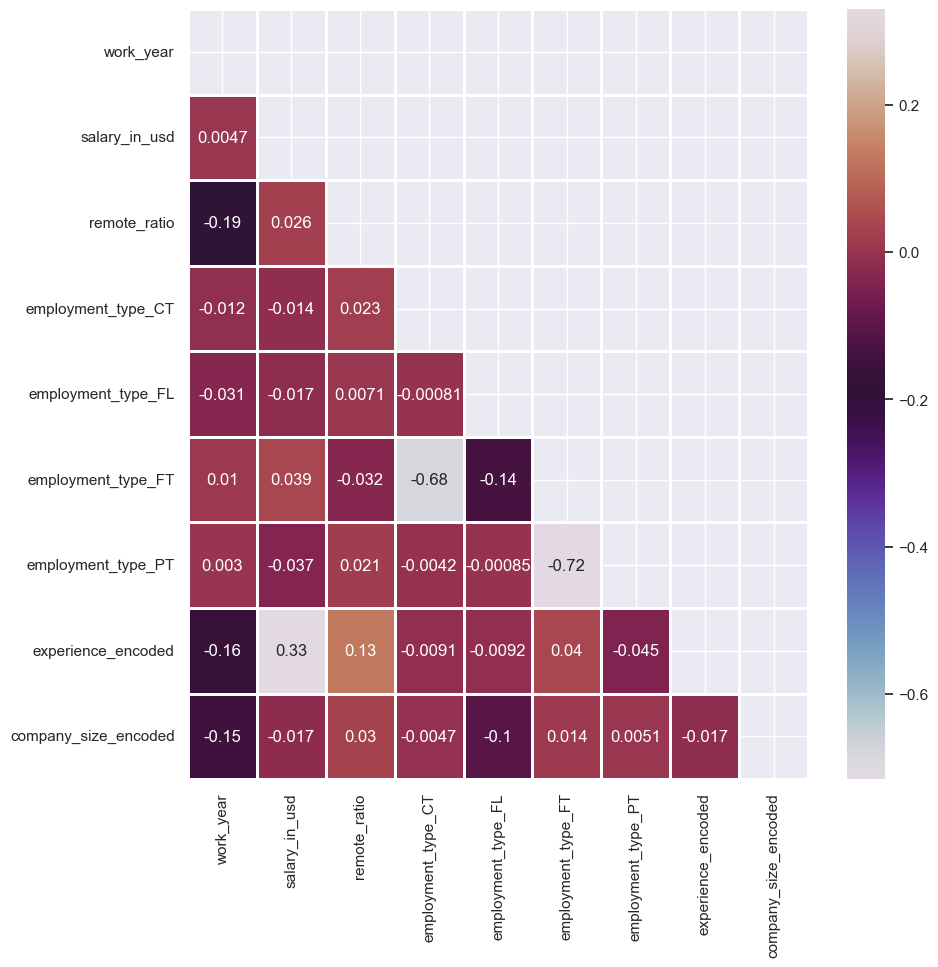

In [43]:
#Option 3: Visualize numerical variables with a cornered heatmap
##Investigating correlation of numerical variables with correlation plot
plt.figure(figsize=(10, 10))
matrix = np.triu(df_analyst3.corr(numeric_only=True))
sns.heatmap(df_analyst3.corr(numeric_only=True), annot=True,
             linewidth=.8, mask=matrix, cmap="twilight");

There seems to be a positive correlation between:
- salary and experience(0.33) and 
- remote ratio and experience (0.13)
Negative correlations were observed between:
- Full time and part time employment (0.-72)
- Work per contract and Full time employment (-0.68)
- Work year and remote ratio (-0.19)
- Work year and experience level (-0.16)
- Work year and company size (-0.15)
- Free lancers and Full time employment (-0.14)

Most of the correlations are weak, because they have a value under 0.5. The two strongest correlations found may point that the companies are preferring to hire data professionals mostly in full time employment type instead of as part time or fixed contract based.

## 2. Hypotheses generation


 The corresponding hypotheses were annotated in the section of ["Information stakeholder and hypotheses"](https://github.com/anaPau-24/Project_Data_Professions_career_shift/blob/main/Information_stakeholder_and_hypotheses.md). For their follow up, they are included in the section 3 of this notebook and denoted as H1, H2 and H3.

## 3.Exploring data to answer hypotheses


### Delete unnecessary data


In [44]:
df_analyst.columns. tolist()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [45]:
# Drop salary currency, salary, employment type and company size columns
df_Jessica = df_analyst.drop(columns=['salary_currency', 'salary','company_size', 'employment_type']) 

# Filter the DataFrame to include only rows where work_year is between 2022 and 2025 
df_recent_years = df_Jessica.query('work_year > 2021 and work_year < 2025')
print(df_recent_years['work_year'].unique())

# Display the first few rows to verify
df_recent_years.head()


[2024 2022 2023]


,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
562,2024,EN,Analytics Engineer,720000,US,0,US
563,2024,EN,Analytics Engineer,170000,US,0,US
564,2024,MI,Analytics Engineer,720000,US,0,US
565,2024,MI,Analytics Engineer,170000,US,0,US
566,2024,MI,Analytics Engineer,720000,US,0,US


In [46]:
#Replace EN experience level with Jr

df_recent_years.loc[df_recent_years['experience_level']=='EN','experience_level']='Jr'
df_recent_years['experience_level'].unique()


array(['Jr', 'MI', 'SE', 'EX'], dtype=object)

### Top 10 positions for Analysts

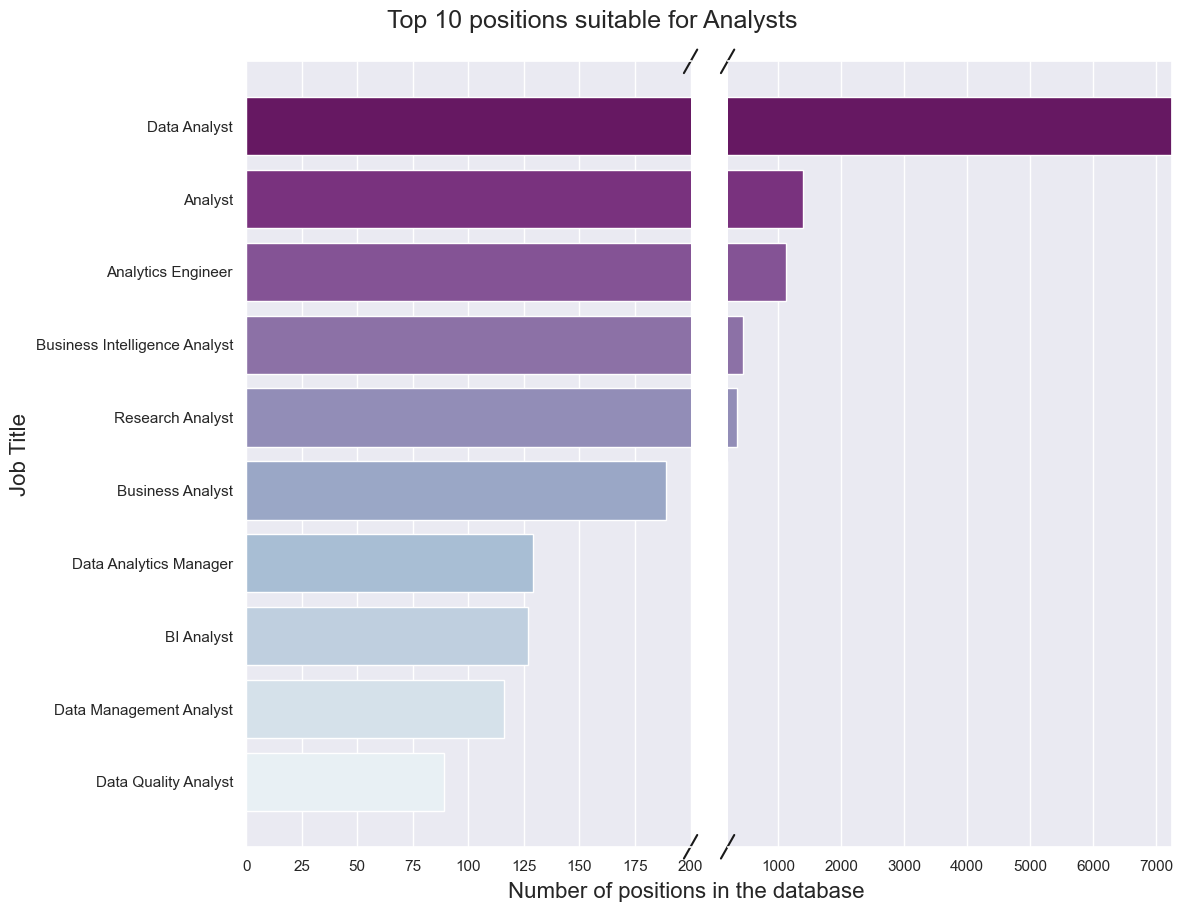

In [47]:
#List of top 10 job titles for Analysts
Top10_JobTitleA=['Data Analyst', 'Analyst','Analytics Engineer', 'Business Intelligence Analyst', 'Research Analyst', 'Business Analyst', 'Data Analytics Manager', 'BI Analyst', 'Data Management Analyst', 'Data Quality Analyst']

#Filter the DataFrame to include only the top 10 job titles for Analysts
Top_10_Analyst= df_recent_years[df_recent_years['job_title'].isin(Top10_JobTitleA)]

#Order the job titles by frequency for the plot
Top_10_Analyst_sorted = Top_10_Analyst['job_title'].value_counts().sort_values(ascending=False).index

# Setting plot theme
sns.set_style('darkgrid')

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 9))

# Define the breaking point
break_point = 200  #  Based on data distribution

# Right plot for larger values
sns.countplot(data=Top_10_Analyst, y='job_title', order=Top_10_Analyst_sorted, palette='BuPu_r',ax=ax2)
ax2.set_xlim(break_point, Top_10_Analyst['job_title'].value_counts().max())  # Focus on larger bars

# Left plot for smaller values
sns.countplot(data=Top_10_Analyst, y='job_title', order=Top_10_Analyst_sorted, palette='BuPu_r', ax=ax1)
ax1.set_xlim(0, break_point)  # Focus on smaller bars

# Hide the spines between the two plots
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add the break marks
d = 0.015  # Break size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)

# Left plot (ax1) break marks
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top right diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom right diagonal

# Right plot (ax2) break marks
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)  # Top left diagonal
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom left diagonal

# Titles and labels
fig.suptitle('Top 10 positions suitable for Analysts',fontsize=18)
ax2.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_ylabel('Job Title', fontsize=16)
# Set a single y-label spanning both subplots
fig.text(0.43, 0.0, 'Number of positions in the database', va='center', rotation=0, fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


### H1. There are not many hybrid nor remote opportunities for Analysts based on data from 2022-2024.
 

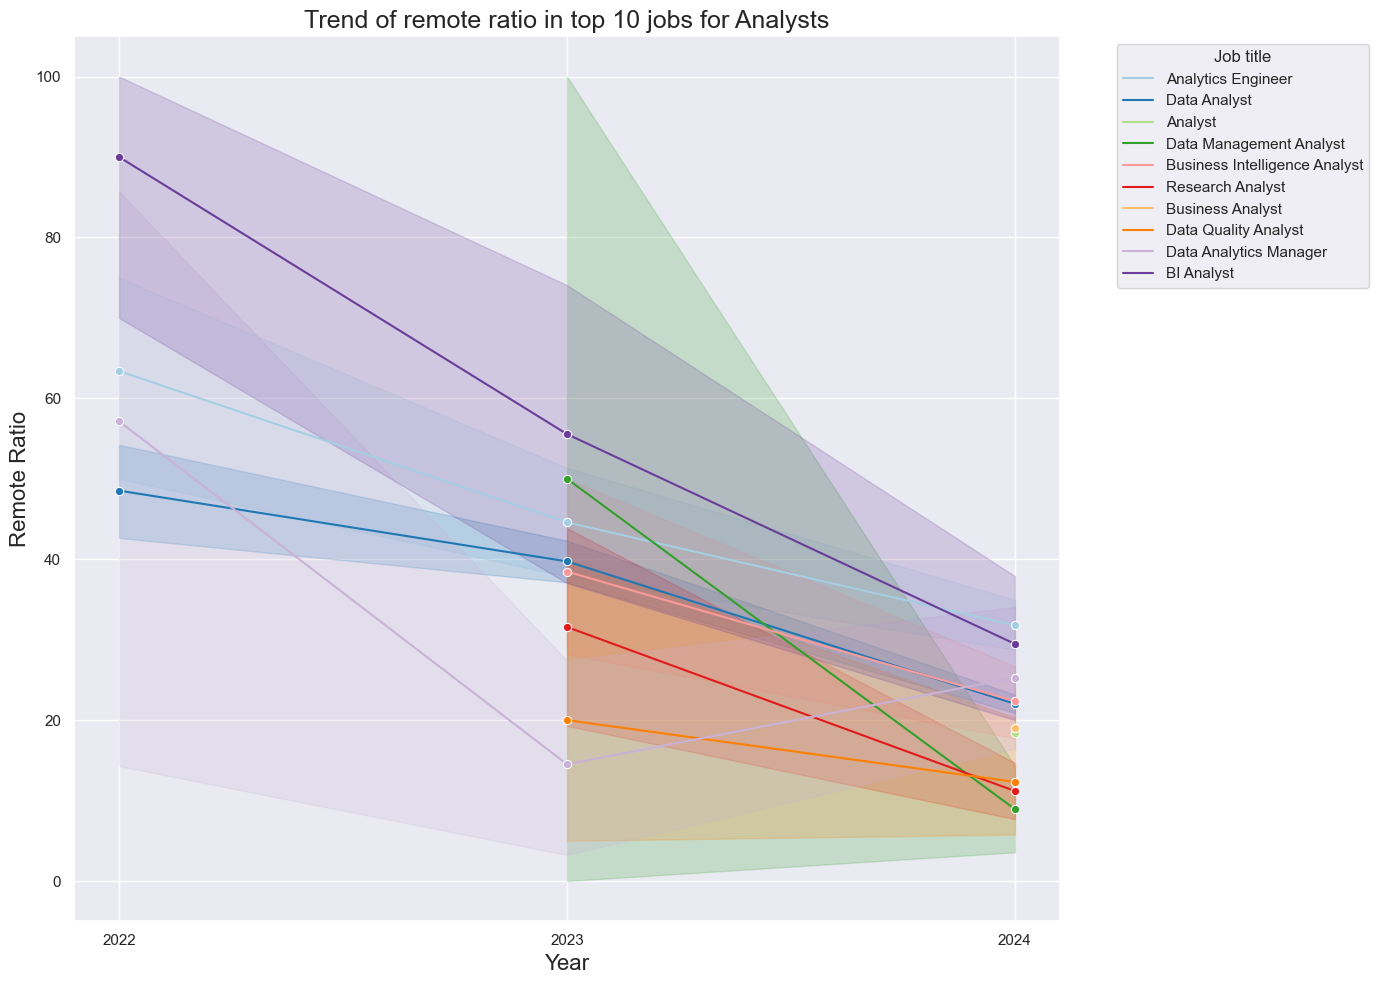

In [48]:
#Visualizing the trend in remote ratio in the Top 10 jobs for Analysts from 2022-2024
plt.figure(figsize=(14, 10))
sns.lineplot(data=Top_10_Analyst, x="work_year", y="remote_ratio", hue="job_title", marker="o",estimator="mean",errorbar=('ci',95),palette="Paired")
plt.title('Trend of remote ratio in top 10 jobs for Analysts',fontsize=18)
plt.xlabel('Year',fontsize=16)
plt.xticks(np.arange(2022, 2025, 1))
plt.xlim(right=2024.1)
plt.ylabel('Remote Ratio',fontsize=16)
plt.legend(title="Job title", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The trend is missleading when analyzing only the years 2022-2024: it may seem that remote work is on decline, but the plot with time span until 2025 (section 1.2) shows that this is not totally true for all the job titles.

In [49]:
#Filter fully remote (remote ratio=100) and hybrid (remote ratio=50)
Remote_A = Top_10_Analyst[Top_10_Analyst['remote_ratio'] == 100]
Hybrid_A = Top_10_Analyst[Top_10_Analyst['remote_ratio'] == 50]

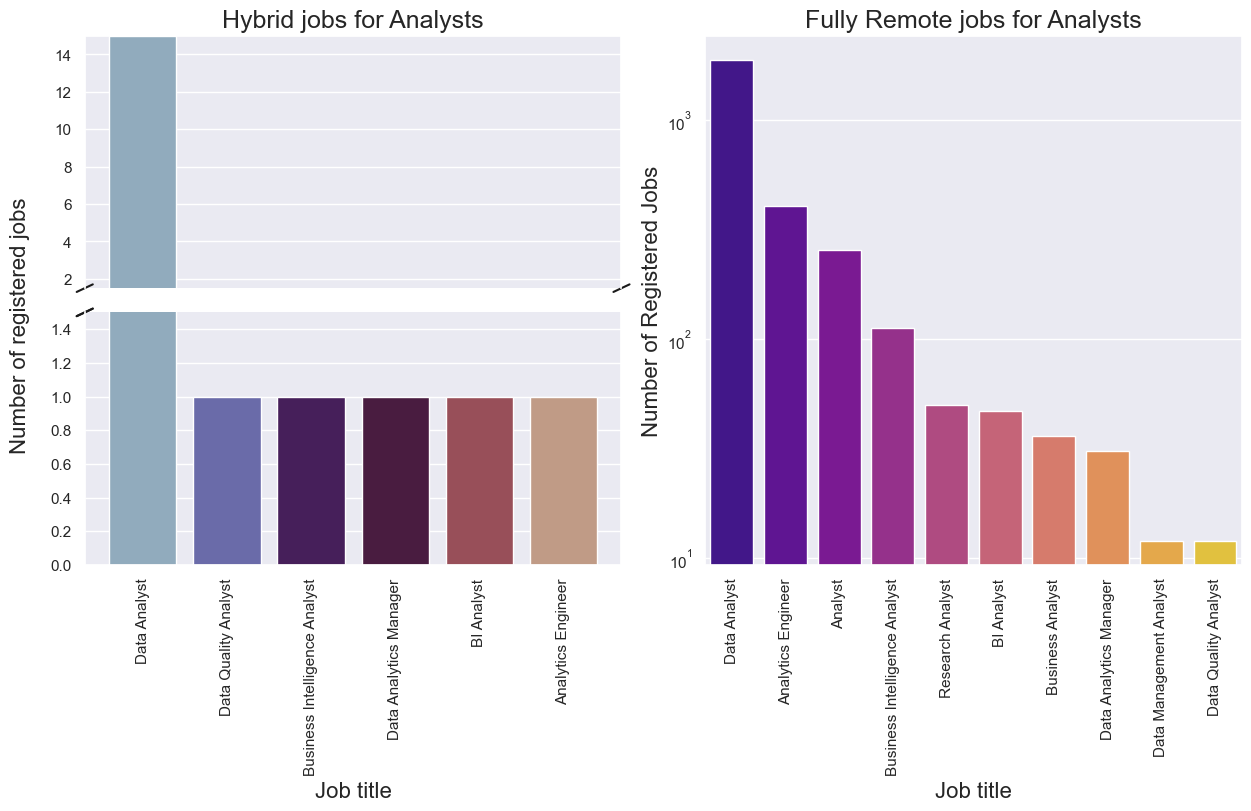

In [50]:
# Plot bar charts with the distribution in years 2022-2024

#Order the job titles by frequency of remote ratio for the plot
Remote_ordered = Remote_A['job_title'].value_counts().sort_values(ascending=False).index
Hybrid_ordered = Hybrid_A['job_title'].value_counts().sort_values(ascending=False).index

sns.set_style('darkgrid')

# Define subplot mosaic layout
fig, axd = plt.subplot_mosaic(
    """
    ac
    bc
    """, figsize=(12, 8), layout="constrained"
)

# HYBRID JOBS WITH A BREAK LINE (axd['a'] & axd['b'])
break_point = 1.5  # Adjust based on data distribution

# Top plot (larger values) → axd['a']
sns.countplot(Hybrid_A, x="job_title", ax=axd['a'], palette='twilight', order=Hybrid_ordered)
axd['a'].set_ylim(break_point, Hybrid_A['job_title'].value_counts().max())
axd['a'].spines['bottom'].set_visible(False)

# Bottom plot (smaller values) → axd['b']
sns.countplot(Hybrid_A, x="job_title", ax=axd['b'], palette='twilight', order=Hybrid_ordered)
axd['b'].set_ylim(0, break_point)
axd['b'].spines['top'].set_visible(False)
axd['b'].set_xlabel('Job Title')

# Add the break marks
d = 0.015  # Break size
kwargs = dict(transform=axd['a'].transAxes, color='k', clip_on=False)
axd['a'].plot((-d, +d), (-d, +d), **kwargs)  # Top left
axd['a'].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top right

kwargs.update(transform=axd['b'].transAxes)
axd['b'].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom left
axd['b'].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom right

# Titles and labels
axd['a'].set_title('Hybrid jobs for Analysts',fontsize=18)
axd['a'].set_xlabel('')
axd['a'].set_xticklabels('')
axd['a'].set_ylabel('')
axd['b'].set_ylabel('')
axd['b'].set_xlabel('Job title', fontsize=16)
axd['b'].tick_params(axis='x', labelrotation=90)
# Set a single y-label spanning both subplots
fig.text(-0.03, 0.6, 'Number of registered jobs', va='center', rotation=90, fontsize=16)

# REMOTE JOBS (axd['c'] - spans both rows on the right)
sns.countplot(Remote_A, x="job_title", ax=axd['c'], palette='plasma', order=Remote_ordered)
axd['c'].set_title('Fully Remote jobs for Analysts',fontsize=18)
axd['c'].set_xlabel('Job title',fontsize=16)
axd['c'].set_ylabel('Number of Registered Jobs',fontsize=16)
axd['c'].tick_params(axis='x', labelrotation=90)

# Set log scale for better visualization
axd['c'].set_yscale('log')

# Show plot
plt.show()


The dataset is limited to conclude if the fully remote opportunities are scarce, but there are some positions registered for full remote work. It could be possible that the Top 5 job titles registered as fully remote serve as a starting point for job search within this modality.

### H2. Analysts with entry level are on demand.


In [51]:
#Overview of the data frame of interest to Jessica
Top_10_Analyst.head()

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location
562,2024,Jr,Analytics Engineer,720000,US,0,US
563,2024,Jr,Analytics Engineer,170000,US,0,US
564,2024,MI,Analytics Engineer,720000,US,0,US
565,2024,MI,Analytics Engineer,170000,US,0,US
566,2024,MI,Analytics Engineer,720000,US,0,US


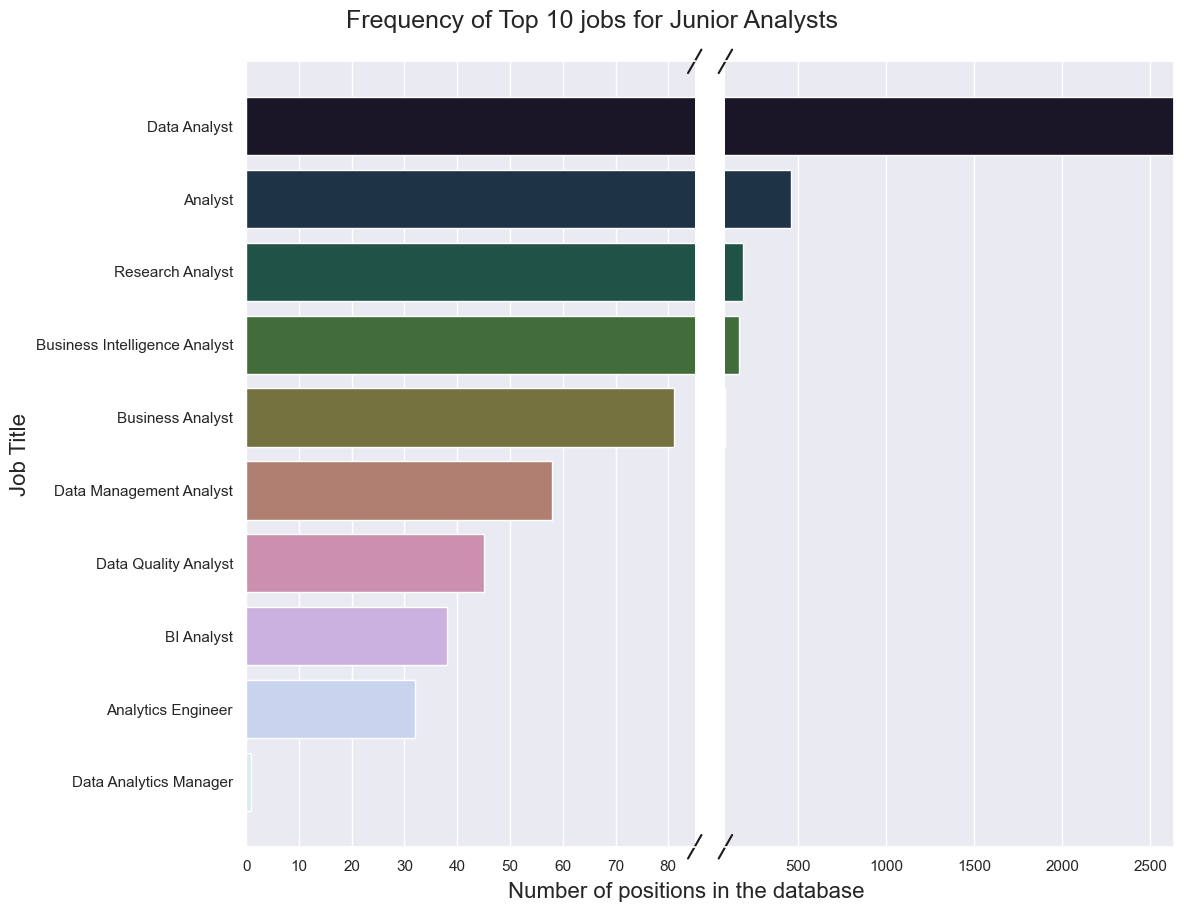

In [52]:
# Plotting reported job titles for Junior Analysts in 2022-2024
#Filter Jr for 10 Top positions suitable for Analysts
Jr_jobs = Top_10_Analyst[Top_10_Analyst['experience_level'] == 'Jr']
Jr_order=Jr_jobs['job_title'].value_counts().sort_values(ascending=False).index

# Plot counplot  with the Top 10 job distribution

# Setting plot theme
sns.set_style('darkgrid')

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 9))

# Define the breaking point
break_point = 85  #  Based on data distribution

# Right plot for larger values
sns.countplot(data=Jr_jobs, y='job_title', order=Jr_order, palette='cubehelix',ax=ax2)
ax2.set_xlim(break_point, Jr_jobs['job_title'].value_counts().max())  # Focus on larger bars

# Left plot for smaller values
sns.countplot(data=Jr_jobs, y='job_title', order=Jr_order, palette='cubehelix', ax=ax1)
ax1.set_xlim(0, break_point)  # Focus on smaller bars

# Hide the spines between the two plots
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add the break marks
d = 0.015  # Break size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)

# Left plot (ax1) break marks
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top right diagonal
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom right diagonal

# Right plot (ax2) break marks
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (-d, +d), **kwargs)  # Top left diagonal
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom left diagonal

# Titles and labels
fig.suptitle('Frequency of Top 10 jobs for Junior Analysts',fontsize=18)
ax2.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_ylabel('Job Title', fontsize=16)
# Set a single y-label spanning both subplots
fig.text(0.43, 0.0, 'Number of positions in the database', va='center', rotation=0, fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

Data Analysts jobs are the most registered within the top 10 jobs for Junior Analysts between 2022-2024. This could mean that this job is demanded and there are good chances for a DA career shift based on the analyzed database.

It could be interesting to further analyze if the Junior positions reported for Analysts changed over time and their relation with the fully remote modality.

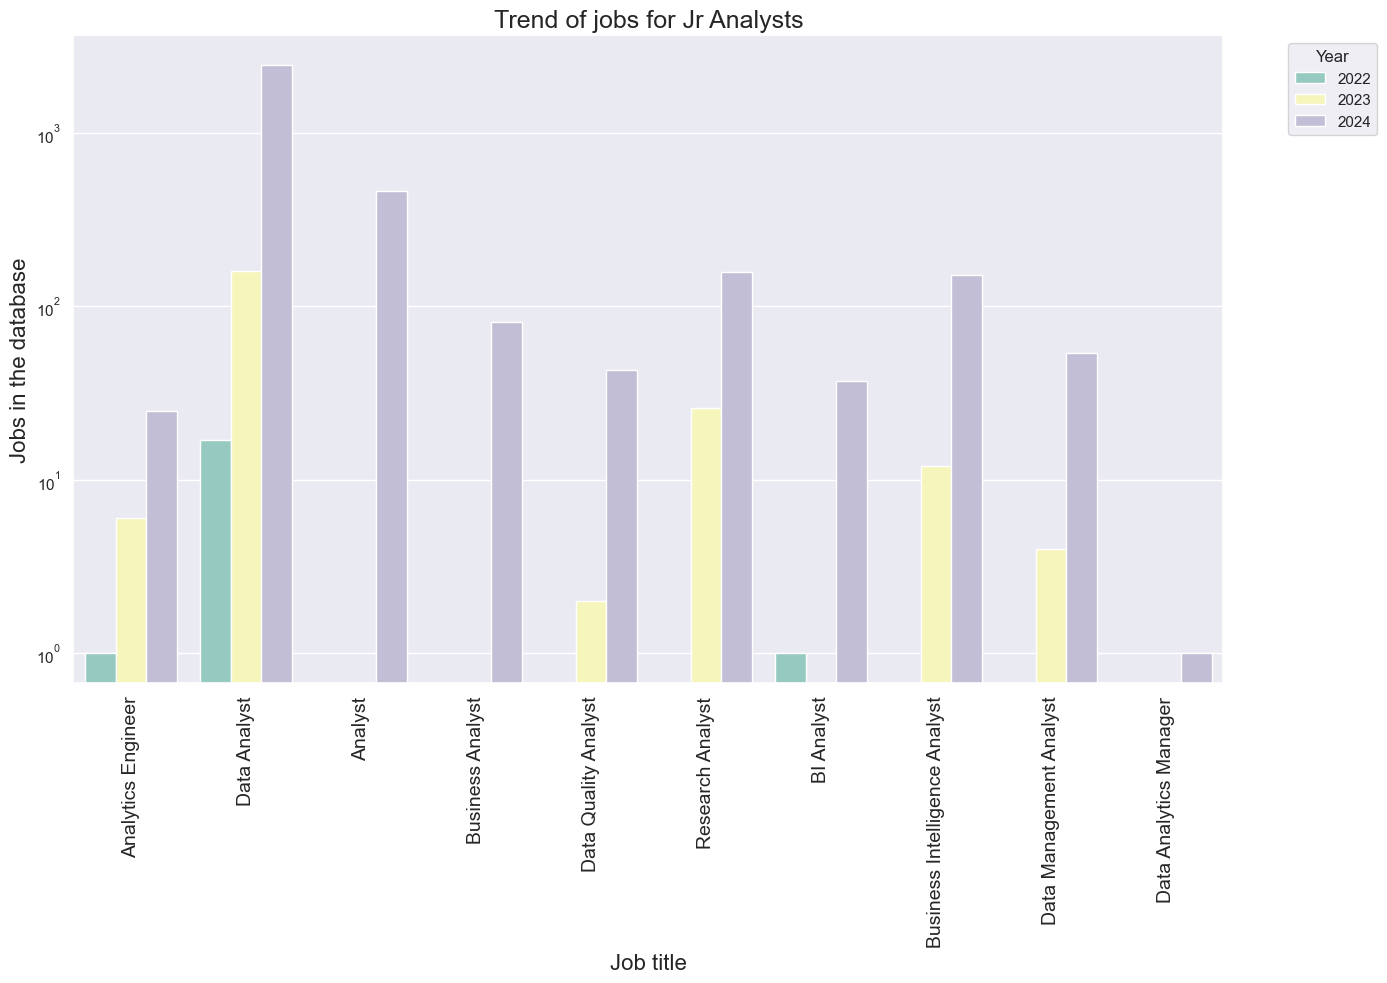

In [53]:
#Positions for Jr professionals vs job title and work_year as hue
plt.figure(figsize=(14, 10))
sns.countplot(data=Jr_jobs, x="job_title", hue="work_year", palette="Set3")
plt.title('Trend of jobs for Jr Analysts',fontsize=18)
plt.xlabel('Job title',fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.ylabel('Jobs in the database',fontsize=16)
plt.yscale('log')
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 ### H3. It is more profitable to relocate out of Germany.

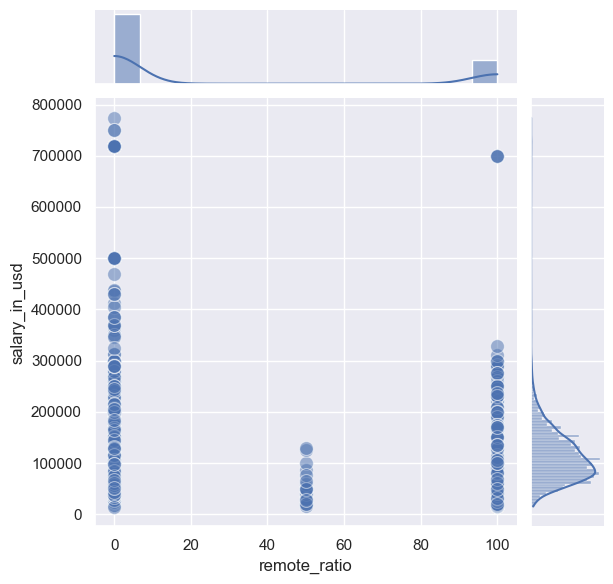

In [54]:
#Investigating relationships between salary and remote ratio
g = sns.JointGrid(data=Top_10_Analyst, x="remote_ratio", y="salary_in_usd")
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

There is no evident linear relationship between the salary and the remote work.

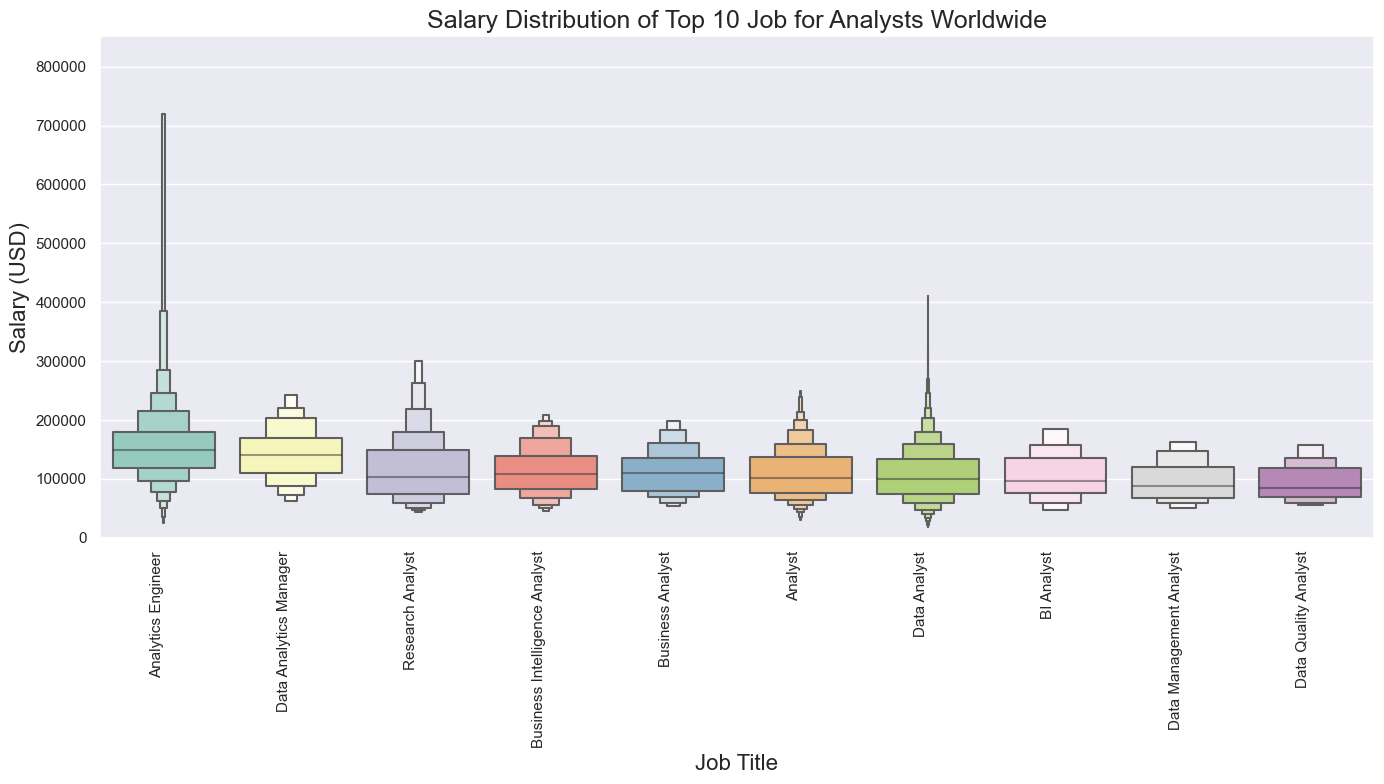

In [55]:
#Salary visualization in top 10 jobs for analysts between 2022-2024

#Descending order of mean salaries 
salary_order2=Top_10_Analyst.groupby('job_title')["salary_in_usd"].mean().sort_values(ascending=False).index

# Boxen plot for salary distribution with improved visibility
plt.figure(figsize=(14, 8))
sns.boxenplot(data=Top_10_Analyst, x="job_title", y="salary_in_usd", palette="Set3",showfliers=False, order=salary_order2)

# Customization for better visibility
plt.title('Salary Distribution of Top 10 Job for Analysts Worldwide', fontsize=18)
plt.xlabel('Job Title', fontsize=16)
plt.ylabel('Salary (USD)', fontsize=16)
plt.xticks(rotation=90, ha='right')  # Rotate labels for readability
plt.ylim(0, Top_10_Analyst['salary_in_usd'].max() * 1.1)  # Adjust y-axis for clarity
plt.tight_layout()
plt.show()

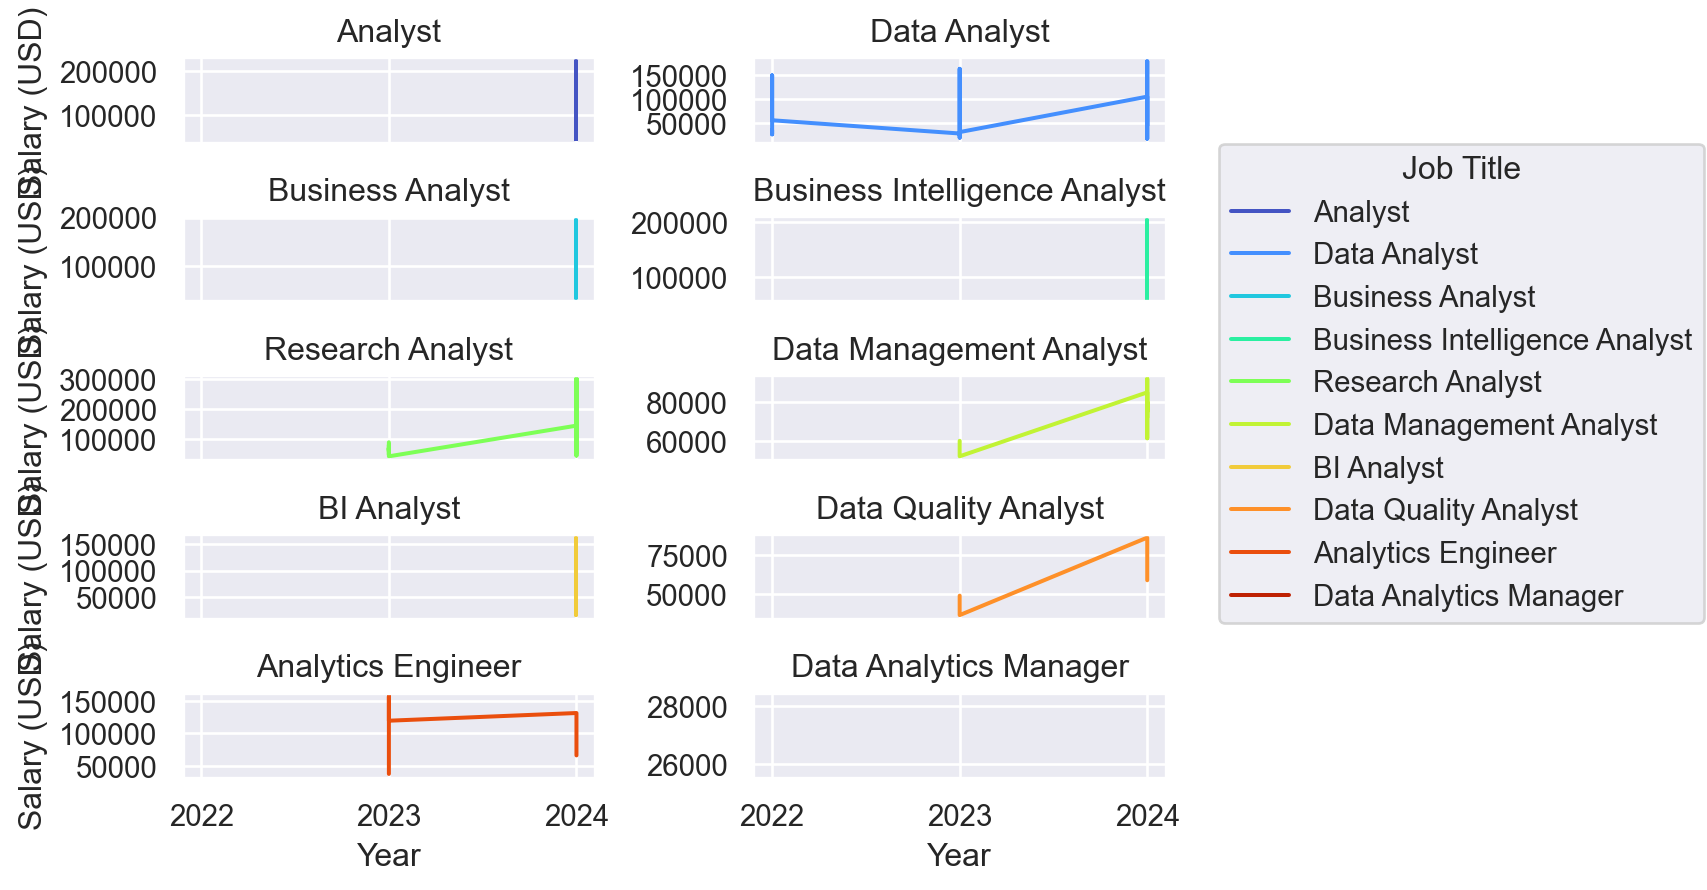

In [56]:
#Salary trend of jobs for Jr Analysts with fully remote work from 2022-2024
Jr_remote = Top_10_Analyst[(Top_10_Analyst['remote_ratio'] == 100)& (Top_10_Analyst['experience_level']== 'Jr')]

#Create the plot
(
    so.Plot(Jr_remote, x="work_year", y="salary_in_usd",color="job_title")
    .facet(col="job_title", wrap=2)
    .add(so.Line())
    .share(x=True,y=False)
    .scale(
        color="turbo", 
        )
    .label(
       y="Salary (USD)", x="Year",
       color="Job Title",  # Sets correct legend title
    )

)

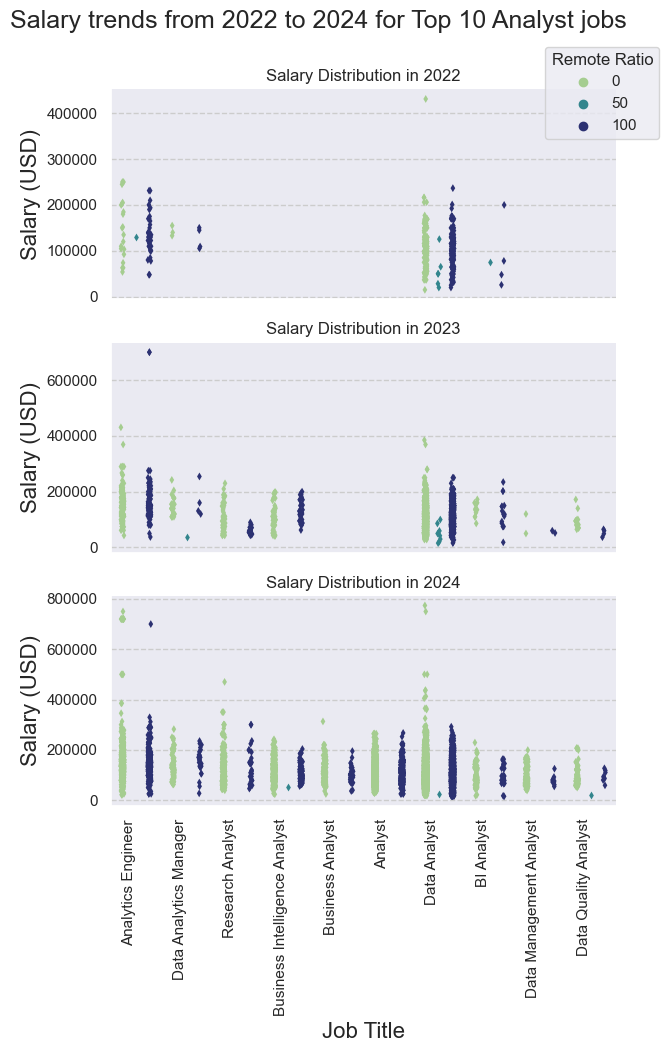

In [57]:
#Visualizing salary in top 10 jobs for Analysts by remote ratio
sns.set_style('darkgrid', {"grid.linestyle": "--", "grid.color": "#cccccc","grid.axis": "x"})

s= sns.catplot(data=Top_10_Analyst, x="job_title", y="salary_in_usd",
               hue="remote_ratio", col="work_year", aspect=1.5,
               palette="crest", col_wrap=1, order=salary_order2, 
               dodge=True, marker="d", size=4,height=3.5, sharey=False,
               legend_out=True)

# Set axis labels
s.set_axis_labels("Job Title", "Salary (USD)", fontsize=16)

# Set subplot titles dynamically based on the "work_year"
s.set_titles(col_template="Salary Distribution in {col_name}")

# Rotate x-axis labels using plt.xticks() instead of set_xticklabels()
for ax in s.axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, ha="right")

# Add a main shared title
s.figure.suptitle("Salary trends from 2022 to 2024 for Top 10 Analyst jobs",
                   fontsize=18, y=1)

# Move legend outside the plot

sns.move_legend(s, "lower center", bbox_to_anchor=(0.95, 0.87),ncol=1,
                title="Remote Ratio", 
                frameon=True)

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show plot
plt.show()


In [58]:
Top_10_Analyst.describe()


,work_year,salary_in_usd,remote_ratio
count,11217,11217,11217
mean,2024,113503,25
std,0,53792,44
min,2022,15000,0
25%,2024,77000,0
50%,2024,105000,0
75%,2024,140000,100
max,2024,774000,100


In [59]:
pd.set_option('display.float_format',lambda x: '%.0f' % x)
DA_salary2 = Top_10_Analyst.groupby('job_title')["salary_in_usd"].mean().sort_values(ascending=False)
print('Mean salary in USD for Data Analyst:',DA_salary2.loc["Data Analyst"])

Mean salary in USD for Data Analyst: 106916.05970766685


Mean salaries remain similar, approximately 103K USD for Data professionals and 107k in specific for Data Analysts.

It may be interesting to compare the salary of DA in Europe, worldwide and Germany.